<a href="https://colab.research.google.com/github/wilferalexander/Fuga_Empleados/blob/main/Fuga_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuga Empleados**

#**Objetivos del proyecto**

Como te ha explicado el director de data science el gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa.

Para ello durante esta semana vas a trabajar en 3 grandes cosas:

1. Entender y cuantificar el problema desde el punto de vista de negocio
2. Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga
3. Comunicar los resultados de forma exitosa a la dirección

## DIA 1: ARRANQUE DEL PROYECTO

**Tareas para hoy**

Hoy nos vamos a centrar solo en 2 tareas, pero de gran importancia.

1. Entender el tipo de solución de data science que vamos a construir
2. Configurar el entorno de trabajo en el que vamos a realizar el proyecto

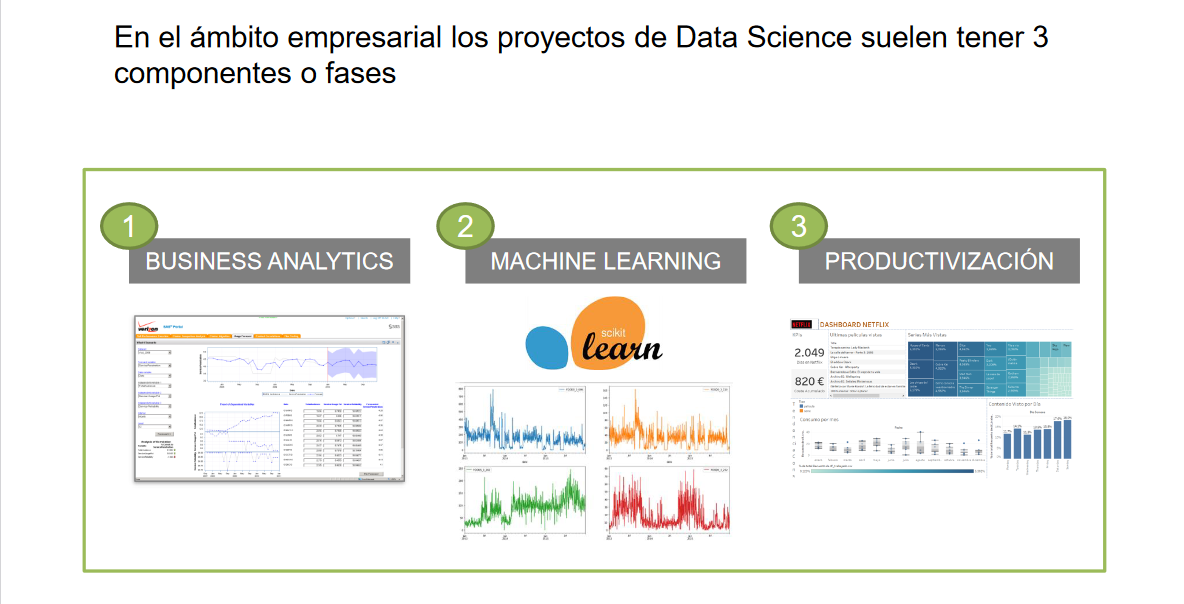

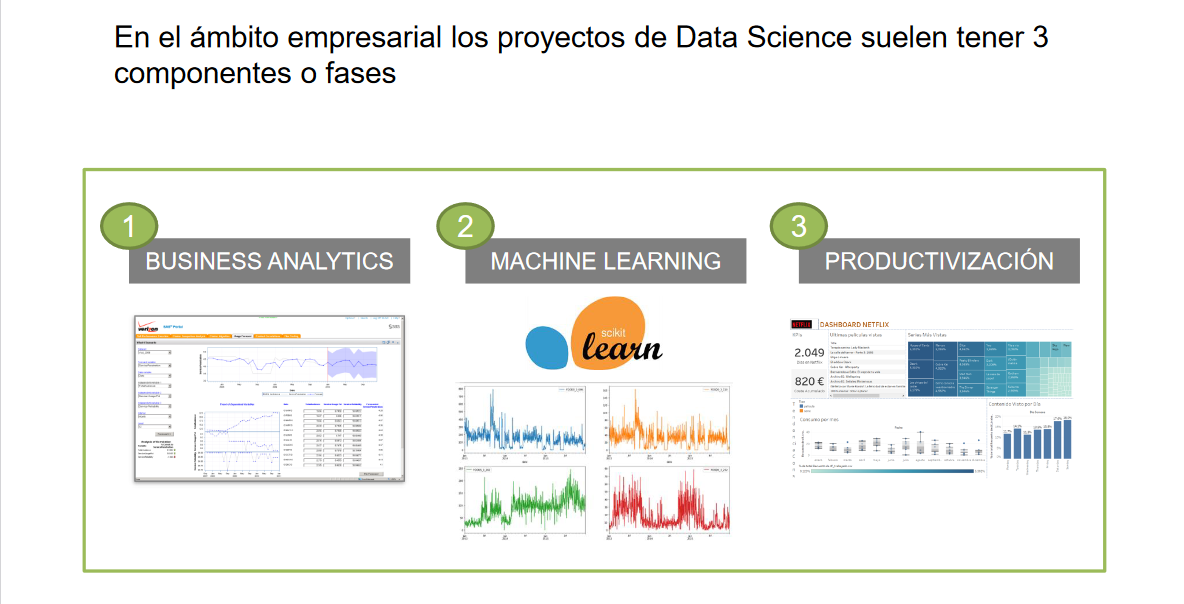


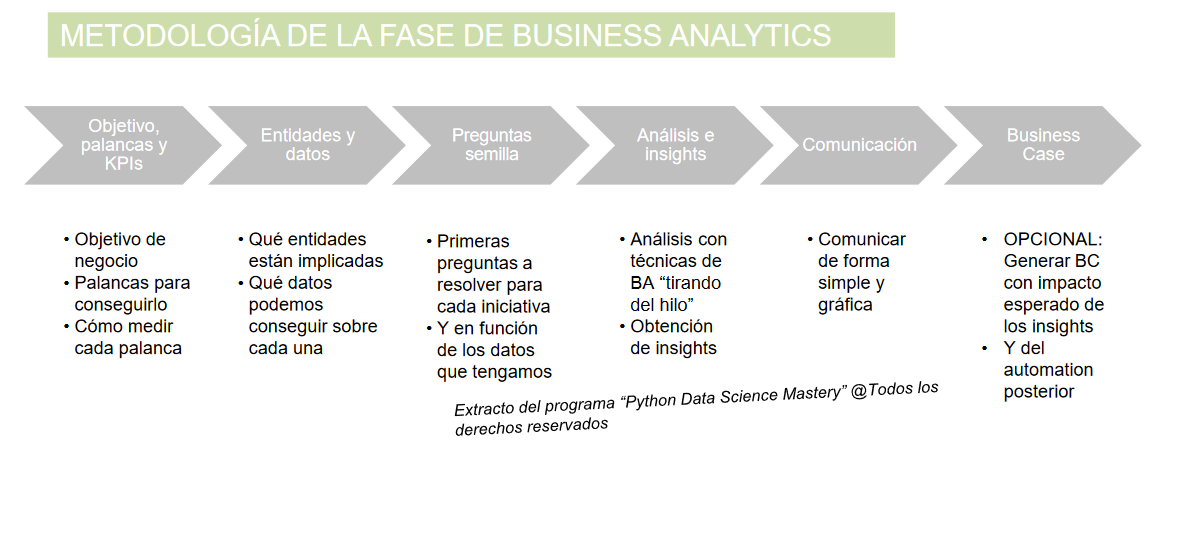

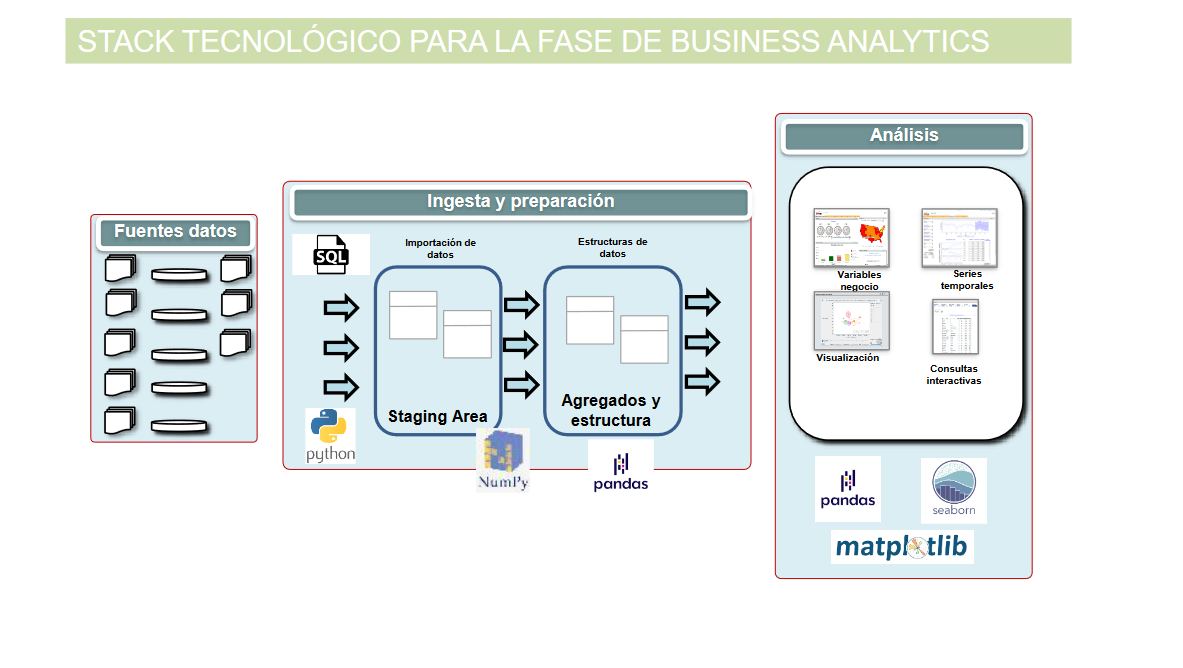

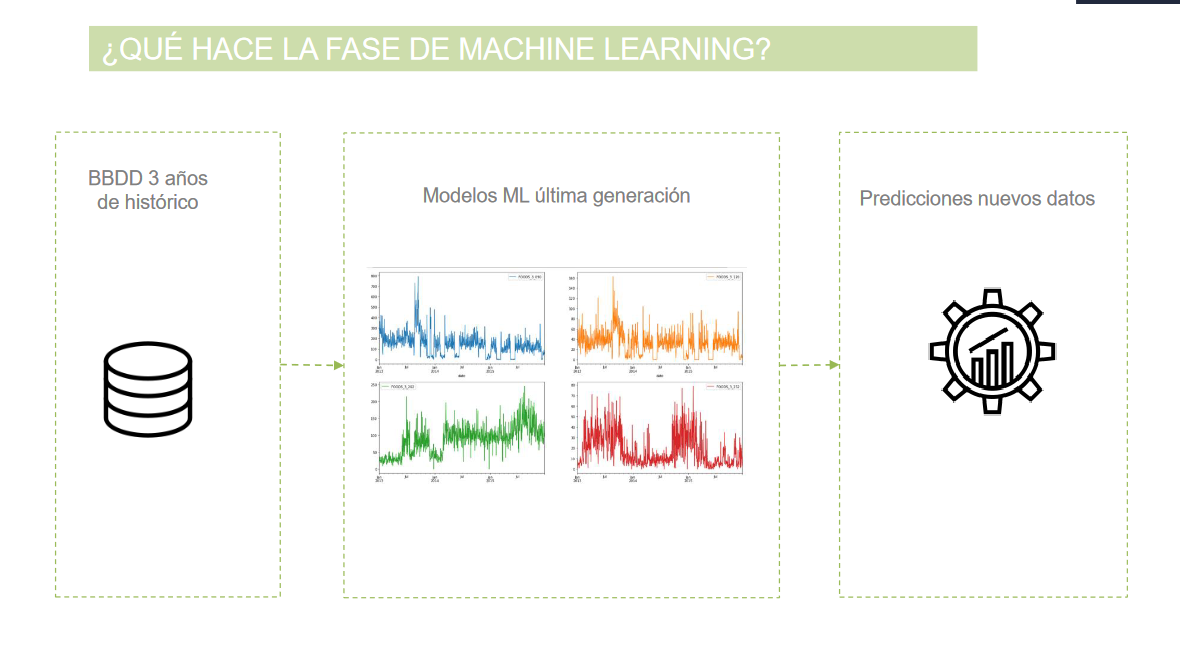

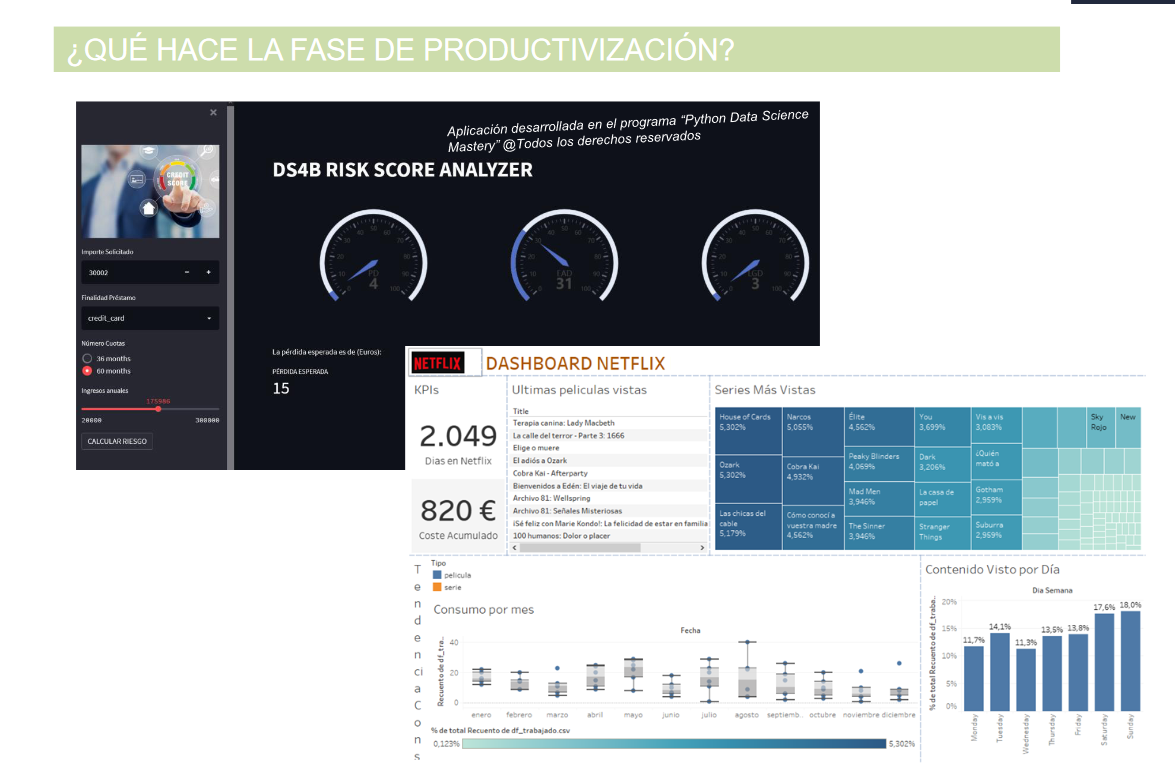

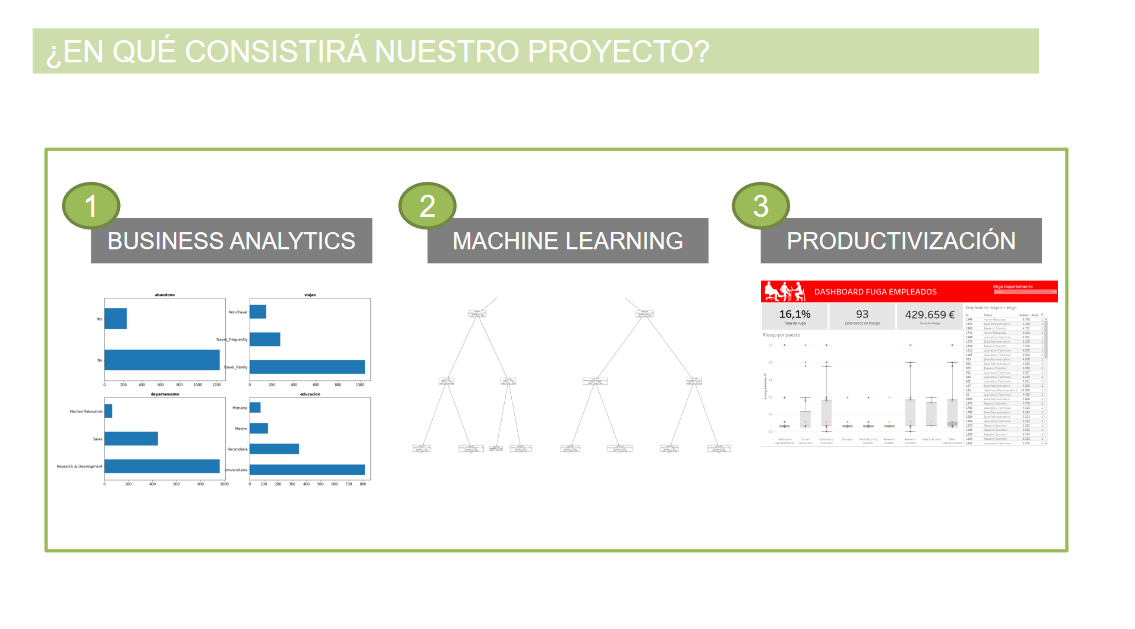


## DIA 1: CONFIGURACIÓN DEL ENTORNO

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### CARGA DE LIBRERIAS


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

### CARGA DE LOS DATOS



Antes de continuar deberás:

  


1.   Haber descargado los datos de la plataforma
2.   Haberlos descomprimido en alguna carpeta de tu disco duro
3. Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)






  



In [59]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col='id', na_values=('#N/D'))

In [60]:
df.sample(5)

edad abandono             viajes            departamento  \
id                                                               
1435    36       No      Travel_Rarely  Research & Development   
394     26      Yes      Travel_Rarely  Research & Development   
1390    39       No      Travel_Rarely                   Sales   
983     38       No         Non-Travel                   Sales   
1350    35       No  Travel_Frequently  Research & Development   

      distancia_casa      educacion           carrera  empleados  \
id                                                                 
1435               4     Secundaria     Life Sciences          1   
394               16  Universitaria           Medical          1   
1390              21     Secundaria     Life Sciences          1   
983               10            NaN  Technical Degree          1   
1350               4            NaN     Life Sciences          1   

     satisfaccion_entorno  sexo  ... satisfaccion_companeros  horas_quincena  \
id                               ...                                           
1435                 Baja   2.0  ...                    Alta              80   
394                  Baja   3.0  ...                Muy_Alta              80   
1390                 Baja   2.0  ...                Muy_Alta              80   
983                  Alta   NaN  ...                   Media              80   
1350                 Alta   3.0  ...                   Media              80   

     nivel_acciones anos_experiencia num_formaciones_ult_ano  conciliacion  \
id                                                                           
1435              0               10                       2           NaN   
394               1                5                       2           NaN   
1390              2                8                       2         Media   
983               0                6                       1           NaN   
1350              0                9                       3           NaN   

      anos_compania anos_en_puesto anos_desde_ult_promocion  \
id                                                            
1435             10            NaN                        1   
394               3            NaN                        0   
1390              5            NaN                        1   
983               5            NaN                        1   
1350              9            3.0                        1   

      anos_con_manager_actual  
id                             
1435                        8  
394                         2  
1390                        4  
983                         3  
1350                        1  

[5 rows x 31 columns]

## DIA 2: BUSINESS ANALYTICS

Identificamos cuantas filas  y columnas tengo en el dataset

In [61]:
#Información de los datos del dataset
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])
print('Datos Duplicados: ', df.duplicated().sum())
print('Variables Categóricas:: ', df.select_dtypes(include='object').shape[1])
print('Variables Numéricas: ', df.select_dtypes(exclude='object').shape[1])

Número de filas:  1470
Número de columnas:  31
Datos Duplicados:  0
Variables Categóricas::  15
Variables Numéricas:  16


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

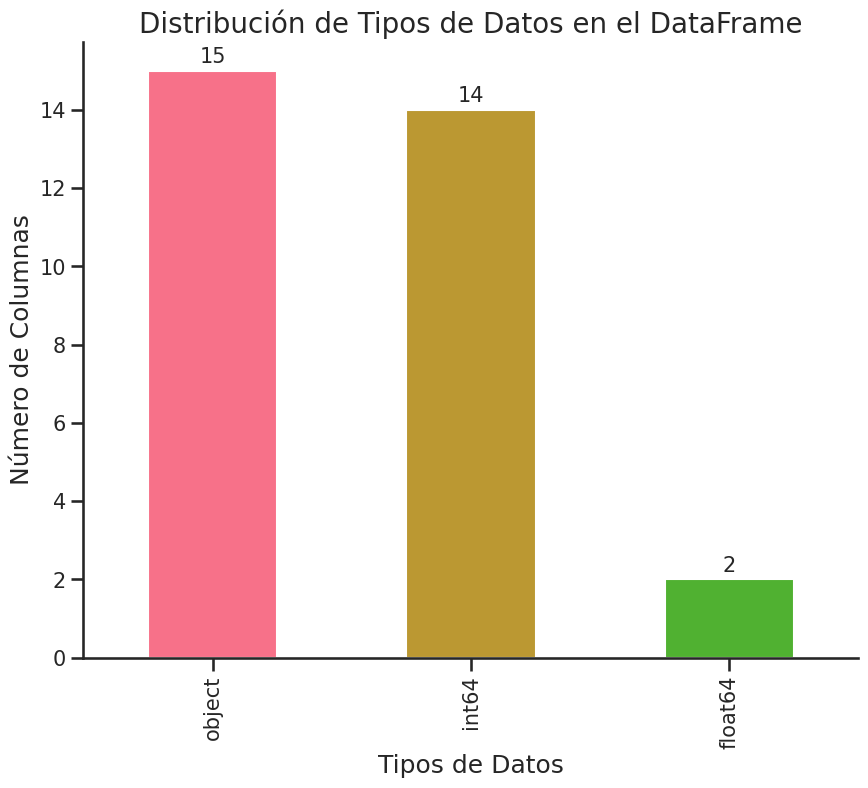

In [63]:
# Establecemos el estilo de Seaborn
sns.set(style ='ticks', context='talk', font_scale=1, palette='husl')
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# contamos los tipos de datos y crea un gráfico de barras
ax = df.dtypes.value_counts().plot(kind='bar',color=sns.color_palette('husl'), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2.,height +0.2, height, ha = 'center', size= 15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el gráfico
plt.show()

#### ANÁLISIS DE NULOS

In [64]:
#datos nulos
df.isnull().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Text(0, 0.5, 'Filas')

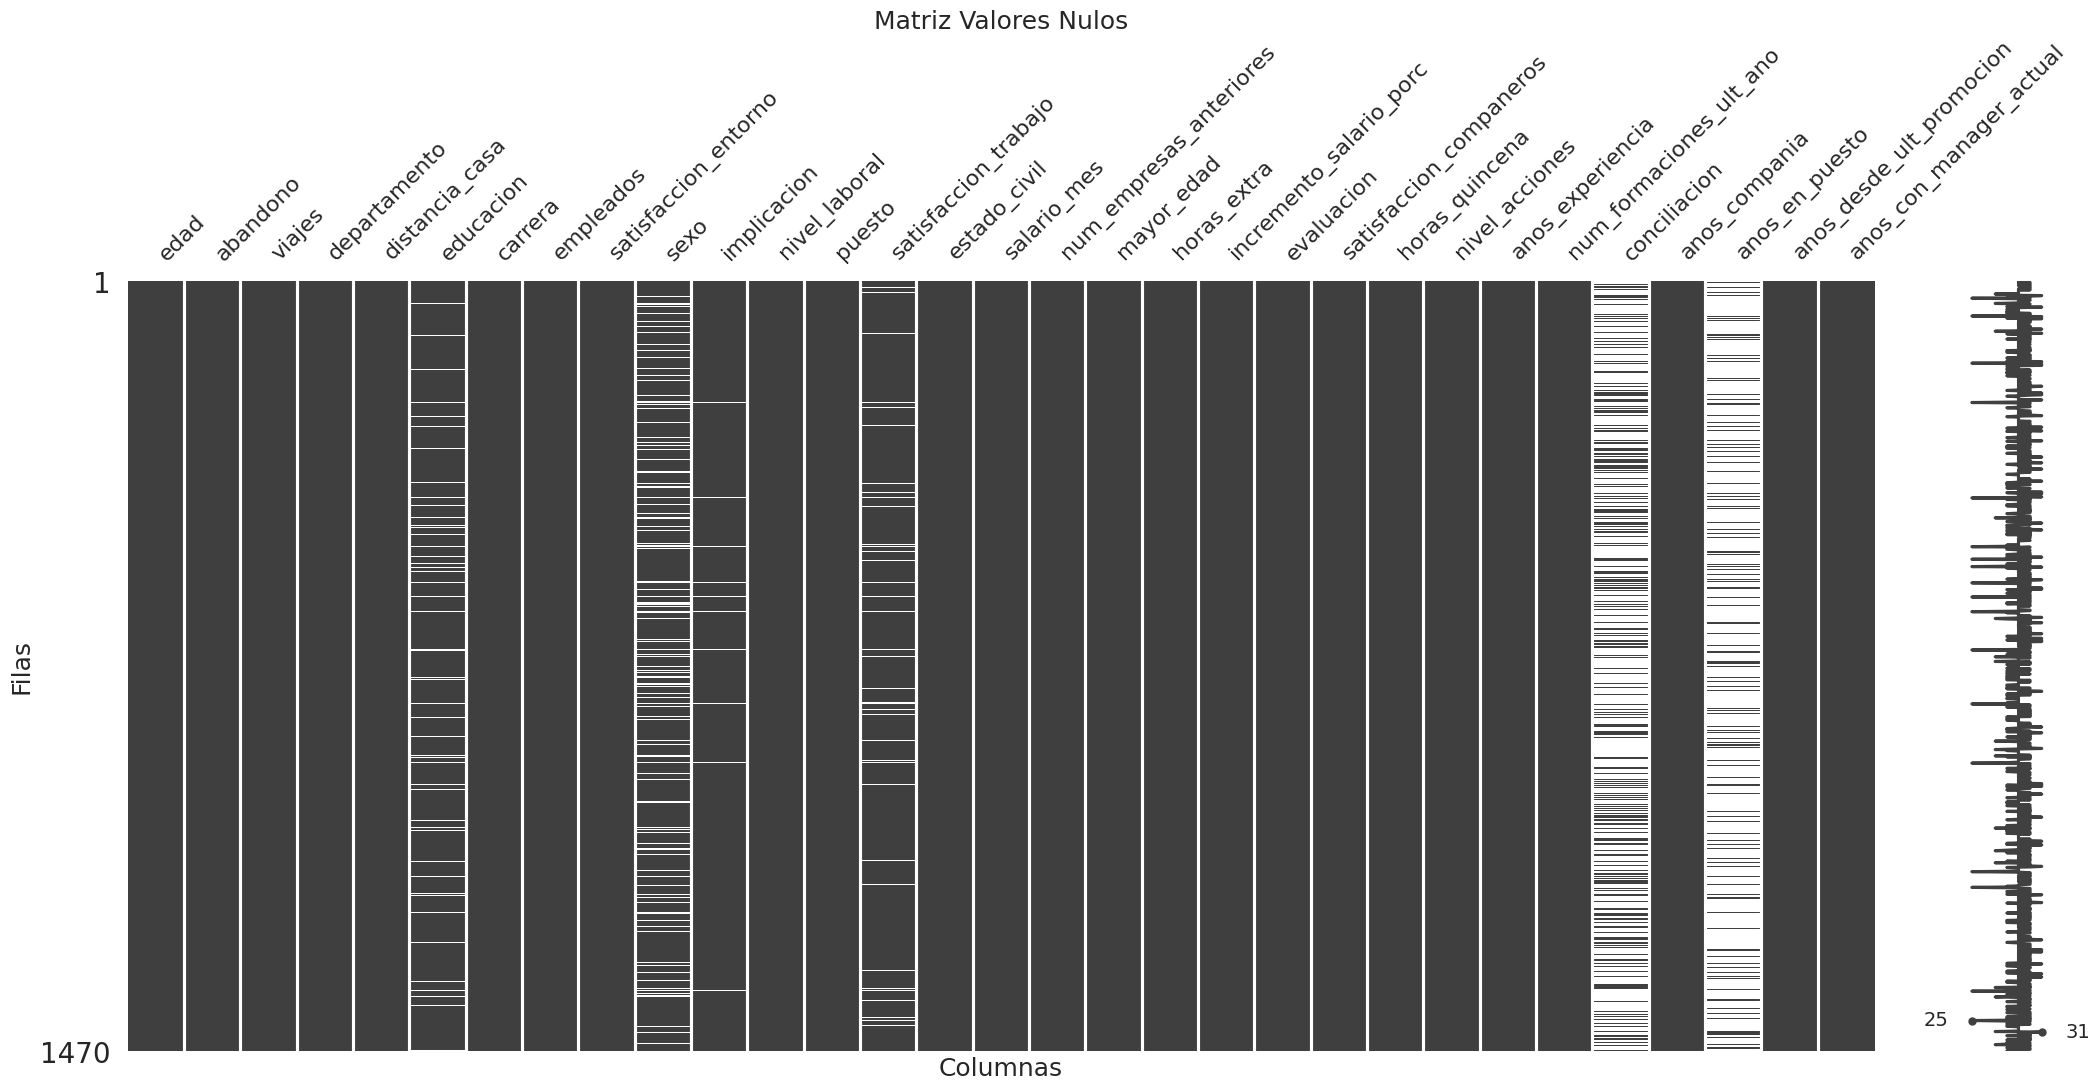

In [65]:
# Visualización con seaborn de los valores nulos
msno.matrix(df)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [66]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.sample(5)

edad abandono             viajes            departamento  \
id                                                               
1645    35      Yes      Travel_Rarely                   Sales   
179     51      Yes  Travel_Frequently  Research & Development   
847     34       No      Travel_Rarely         Human Resources   
1179    30       No      Travel_Rarely                   Sales   
364     28      Yes      Travel_Rarely  Research & Development   

      distancia_casa      educacion          carrera  empleados  \
id                                                                
1645              15       Primaria          Medical          1   
179                8       Primaria    Life Sciences          1   
847                3  Universitaria  Human Resources          1   
1179              10     Secundaria        Marketing          1   
364                2  Universitaria    Life Sciences          1   

     satisfaccion_entorno  sexo  ... incremento_salario_porc  evaluacion  \
id                               ...                                       
1645                 Baja   1.0  ...                      14        Alta   
179                  Baja   1.0  ...                      15        Alta   
847                  Alta   NaN  ...                      19        Alta   
1179                 Alta   2.0  ...                      18        Alta   
364                  Baja   3.0  ...                      11        Alta   

     satisfaccion_companeros horas_quincena nivel_acciones  anos_experiencia  \
id                                                                             
1645                Muy_Alta             80              2                 7   
179                 Muy_Alta             80              0                18   
847                     Alta             80              1                 4   
1179                    Baja             80              1                10   
364                     Alta             80              0                 5   

      num_formaciones_ult_ano anos_compania anos_desde_ult_promocion  \
id                                                                     
1645                        2             2                        2   
179                         2             4                        0   
847                         1             3                        0   
1179                        3            10                        1   
364                         5             0                        0   

      anos_con_manager_actual  
id                             
1645                        2  
179                         3  
847                         2  
1179                        4  
364                         0  

[5 rows x 29 columns]

In [67]:
#Información de los datos del dataset
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])
print('Datos Duplicados: ', df.duplicated().sum())
print('Variables Categóricas:: ', df.select_dtypes(include='object').shape[1])
print('Variables Numéricas: ', df.select_dtypes(exclude='object').shape[1])

Número de filas:  1470
Número de columnas:  29
Datos Duplicados:  0
Variables Categóricas::  14
Variables Numéricas:  15


Text(0, 0.5, 'Filas')

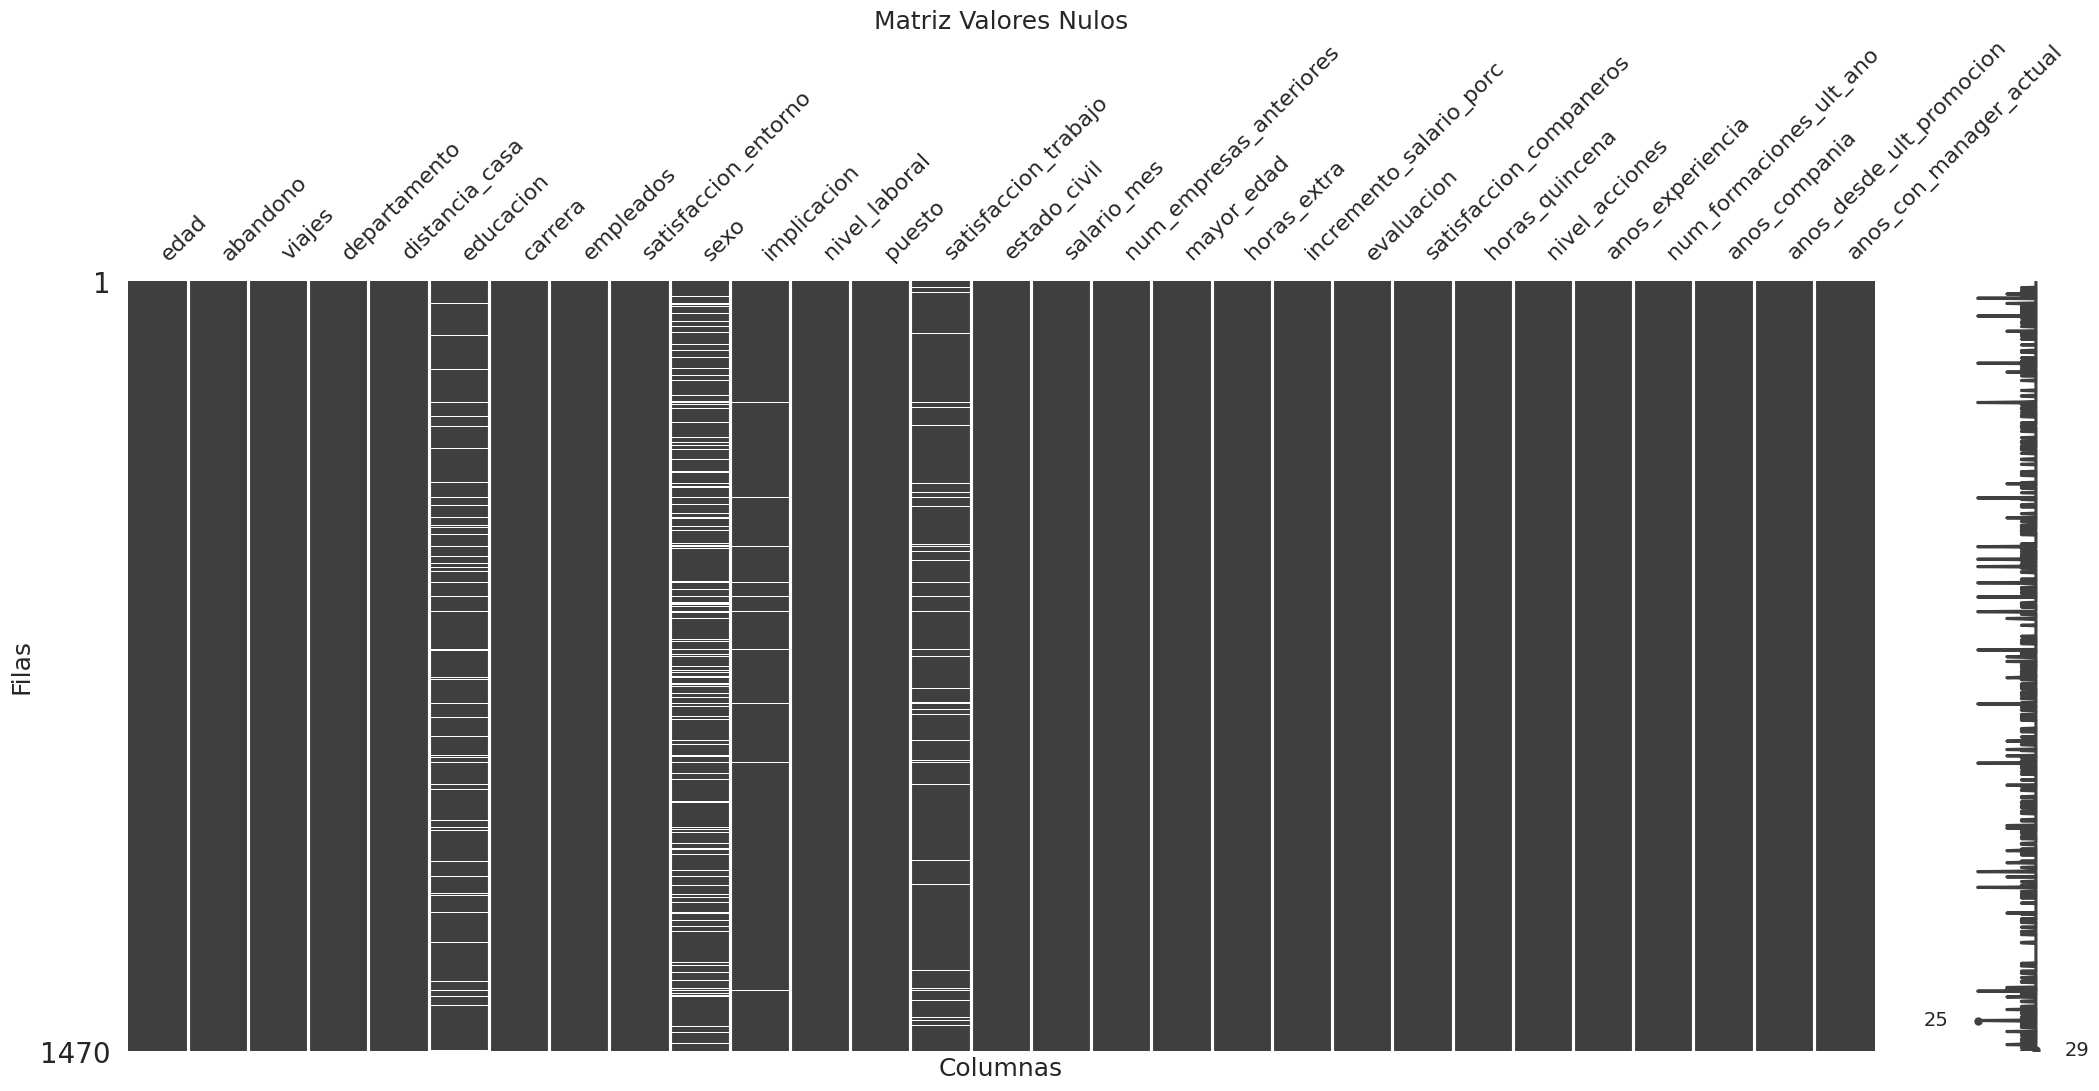

In [68]:
# Visualización con seaborn de los valores nulos
msno.matrix(df)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

#### EDA VARIABLES CATEGÓRICAS

In [69]:
def graficos_eda_categoricos(cat):

  #calculamos el número de filas que necesitamos
  from math import ceil
  filas =ceil(cat.shape[1]/2)

  #definimos el grafico
  f, ax = plt.subplots(nrows= filas, ncols=  2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que crea los grafico

  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax= ax[cada])
    ax[cada].set_title(variable,fontsize= 12, fontweight = 'bold')
    ax[cada].tick_params(labelsize = 12)

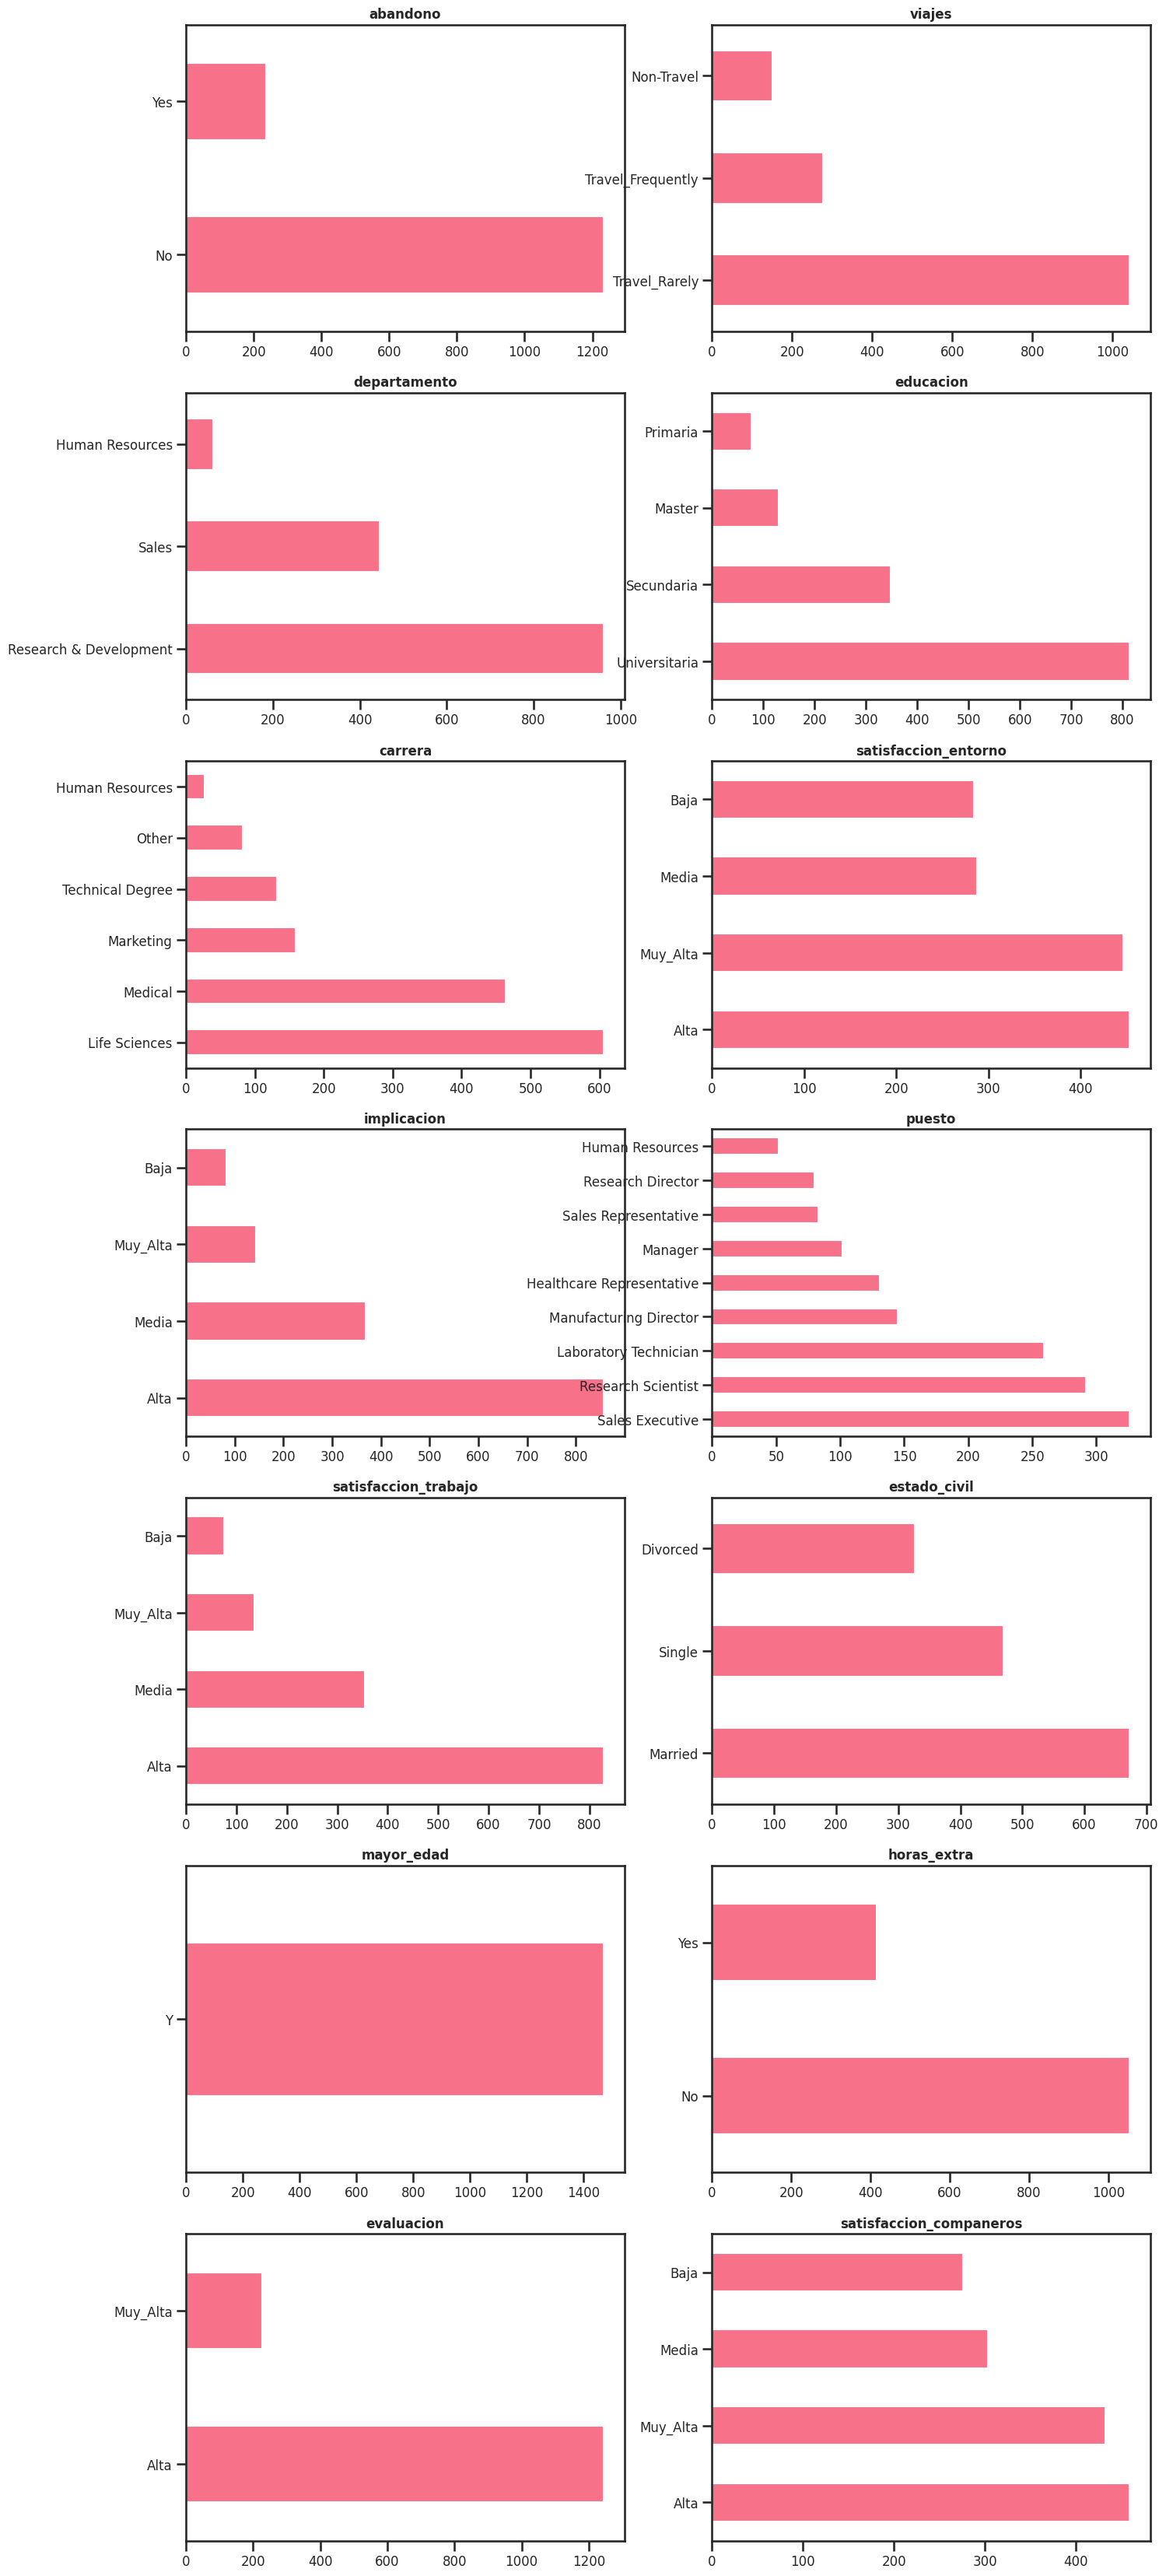

In [70]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [71]:
df.drop(columns ='mayor_edad', inplace = True)
df['educacion']= df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo']= df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [72]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [73]:
estadisticos_cont(df.select_dtypes('number'))

count         mean  median          std     min  \
edad                      1470.0    36.923810    36.0     9.135373    18.0   
distancia_casa            1470.0     9.192517     7.0     8.106864     1.0   
empleados                 1470.0     1.000000     1.0     0.000000     1.0   
sexo                      1271.0     2.727773     3.0     0.720788     1.0   
nivel_laboral             1470.0     2.063946     2.0     1.106940     1.0   
salario_mes               1470.0  6502.931293  4919.0  4707.956783  1009.0   
num_empresas_anteriores   1470.0     2.693197     2.0     2.498009     0.0   
incremento_salario_porc   1470.0    15.209524    14.0     3.659938    11.0   
horas_quincena            1470.0    80.000000    80.0     0.000000    80.0   
nivel_acciones            1470.0     0.793878     1.0     0.852077     0.0   
anos_experiencia          1470.0    11.279592    10.0     7.780782     0.0   
num_formaciones_ult_ano   1470.0     2.799320     3.0     1.289271     0.0   
anos_compania             1470.0     7.008163     5.0     6.126525     0.0   
anos_desde_ult_promocion  1470.0     2.187755     1.0     3.222430     0.0   
anos_con_manager_actual   1470.0     4.123129     3.0     3.568136     0.0   

                             25%     50%     75%      max  
edad                        30.0    36.0    43.0     60.0  
distancia_casa               2.0     7.0    14.0     29.0  
empleados                    1.0     1.0     1.0      1.0  
sexo                         2.0     3.0     3.0      4.0  
nivel_laboral                1.0     2.0     3.0      5.0  
salario_mes               2911.0  4919.0  8379.0  19999.0  
num_empresas_anteriores      1.0     2.0     4.0      9.0  
incremento_salario_porc     12.0    14.0    18.0     25.0  
horas_quincena              80.0    80.0    80.0     80.0  
nivel_acciones               0.0     1.0     1.0      3.0  
anos_experiencia             6.0    10.0    15.0     40.0  
num_formaciones_ult_ano      2.0     3.0     3.0      6.0  
anos_compania                3.0     5.0     9.0     40.0  
anos_desde_ult_promocion     0.0     1.0     3.0     15.0  
anos_con_manager_actual      2.0     3.0     7.0     17.0

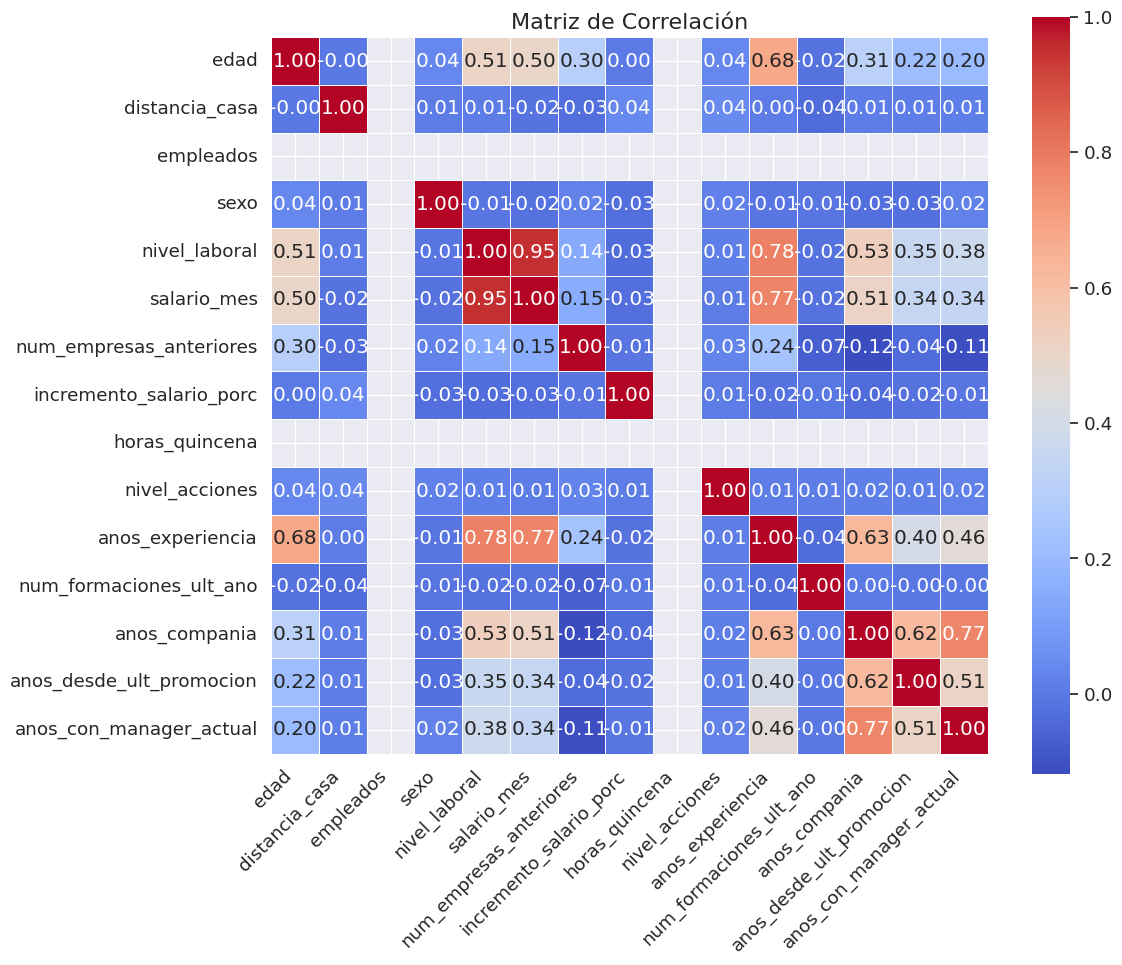

In [74]:
# Filtrar las columnas numéricas
df_numeric = df.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [75]:
df.drop(columns= ['empleados','sexo','horas_quincena'], inplace = True)
df

edad abandono             viajes            departamento  \
id                                                               
1       41      Yes      Travel_Rarely                   Sales   
2       49       No  Travel_Frequently  Research & Development   
4       37      Yes      Travel_Rarely  Research & Development   
5       33       No  Travel_Frequently  Research & Development   
7       27       No      Travel_Rarely  Research & Development   
...    ...      ...                ...                     ...   
2061    36       No  Travel_Frequently  Research & Development   
2062    39       No      Travel_Rarely  Research & Development   
2064    27       No      Travel_Rarely  Research & Development   
2065    49       No  Travel_Frequently                   Sales   
2068    34       No      Travel_Rarely  Research & Development   

      distancia_casa      educacion        carrera satisfaccion_entorno  \
id                                                                        
1                  1  Universitaria  Life Sciences                Media   
2                  8     Secundaria  Life Sciences                 Alta   
4                  2     Secundaria          Other             Muy_Alta   
5                  3  Universitaria  Life Sciences             Muy_Alta   
7                  2  Universitaria        Medical                 Baja   
...              ...            ...            ...                  ...   
2061              23         Master        Medical                 Alta   
2062               6     Secundaria        Medical             Muy_Alta   
2064               4         Master  Life Sciences                Media   
2065               2     Secundaria        Medical             Muy_Alta   
2068               8  Universitaria        Medical                Media   

     implicacion  nivel_laboral  ... horas_extra incremento_salario_porc  \
id                               ...                                       
1           Alta              2  ...         Yes                      11   
2          Media              2  ...          No                      23   
4          Media              1  ...         Yes                      15   
5           Alta              1  ...         Yes                      11   
7           Alta              1  ...          No                      12   
...          ...            ...  ...         ...                     ...   
2061    Muy_Alta              2  ...          No                      17   
2062       Media              3  ...          No                      15   
2064    Muy_Alta              2  ...         Yes                      20   
2065       Media              2  ...          No                      14   
2068    Muy_Alta              2  ...          No                      12   

     evaluacion  satisfaccion_companeros  nivel_acciones anos_experiencia  \
id                                                                          
1          Alta                     Baja               0                8   
2      Muy_Alta                 Muy_Alta               1               10   
4          Alta                    Media               0                7   
5          Alta                     Alta               0                8   
7          Alta                 Muy_Alta               1                6   
...         ...                      ...             ...              ...   
2061       Alta                     Alta               1               17   
2062       Alta                     Baja               1                9   
2064   Muy_Alta                    Media               1                6   
2065       Alta                 Muy_Alta               0               17   
2068       Alta                     Baja               0                6   

      num_formaciones_ult_ano anos_compania anos_desde_ult_promocion  \
id                                                                     
1                           0       

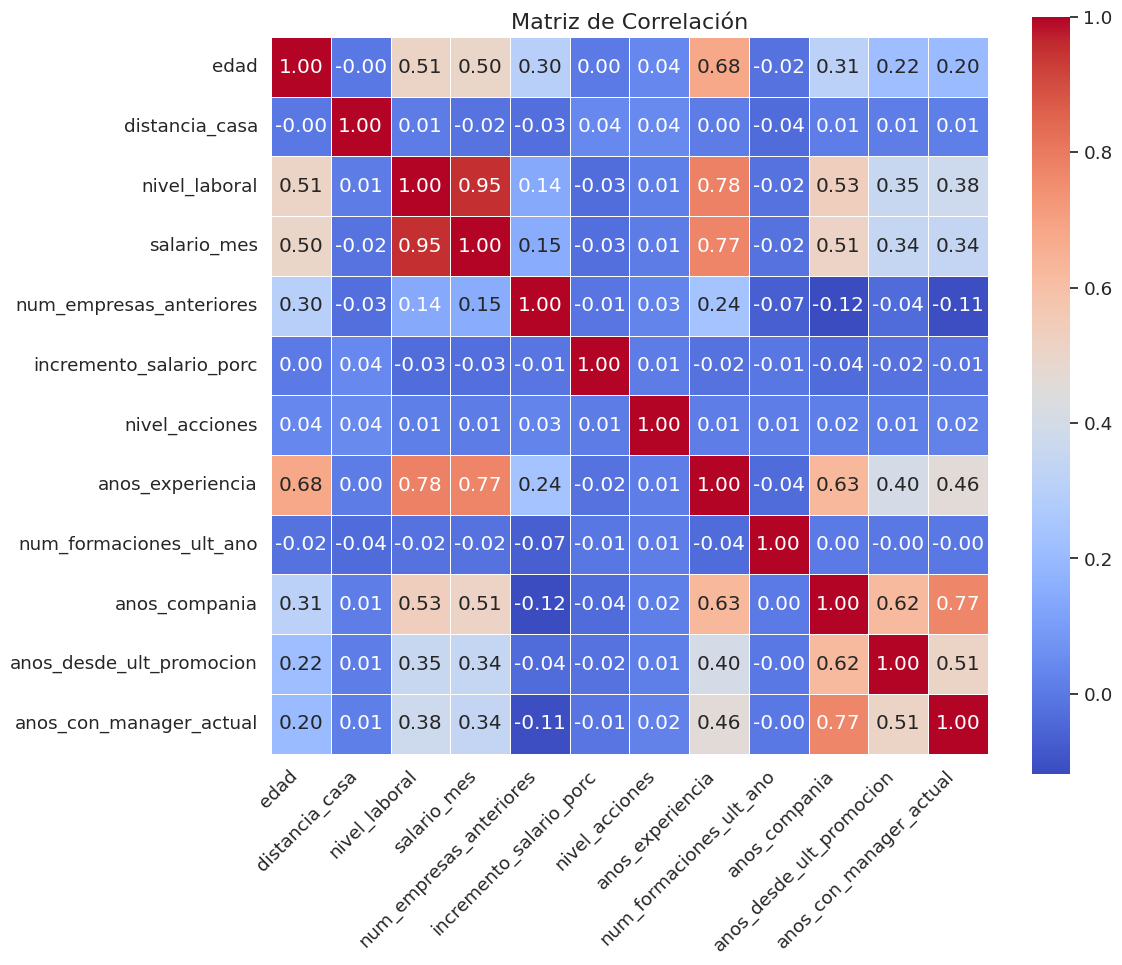

In [76]:
# Filtrar las columnas numéricas
df_numeric = df.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [77]:
df.abandono.value_counts(normalize = True)* 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [78]:
1. #transformar abandono a numeros
df['abandono'] = df.abandono.map({'No': 0,'Yes':1})

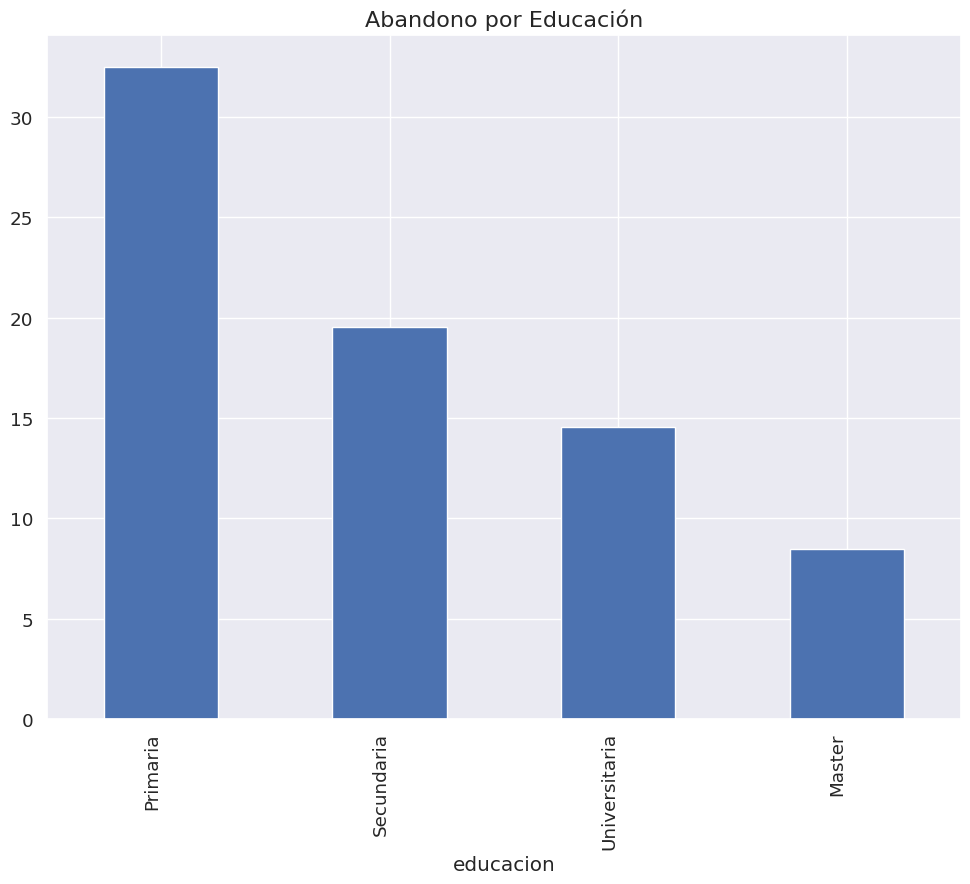

In [79]:
#analis por educacion
temp = df.groupby('educacion').abandono.mean().sort_values(ascending= False)* 100

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por Educación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()





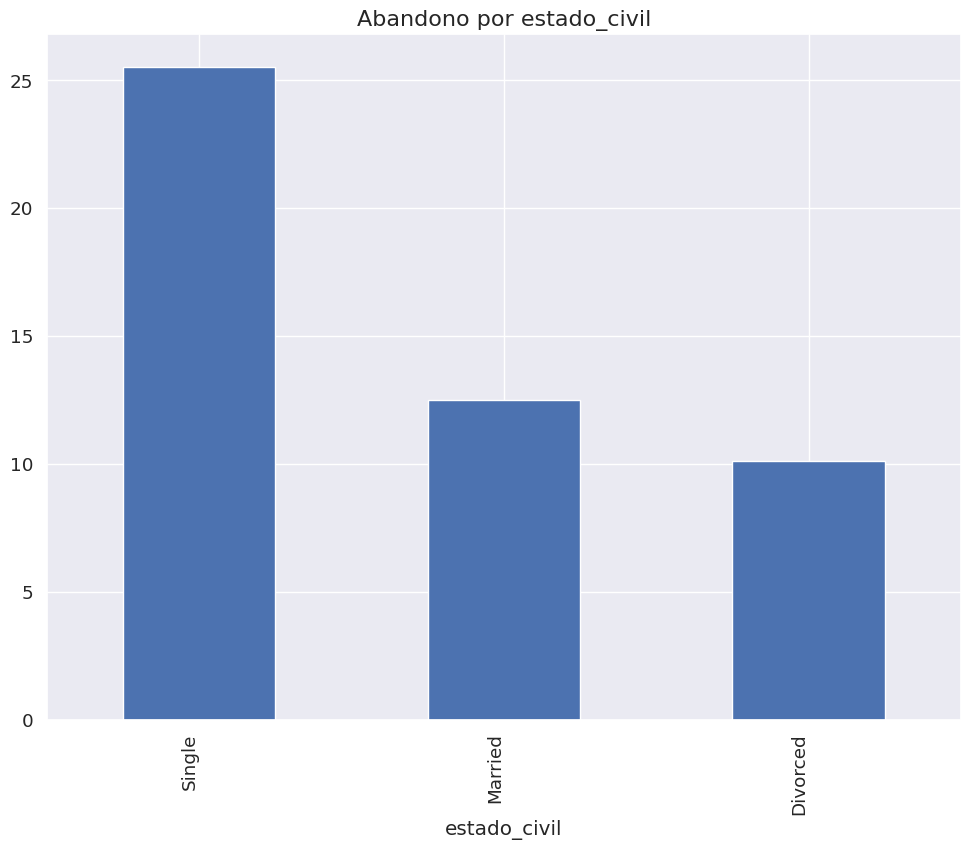

In [80]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por estado_civil', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

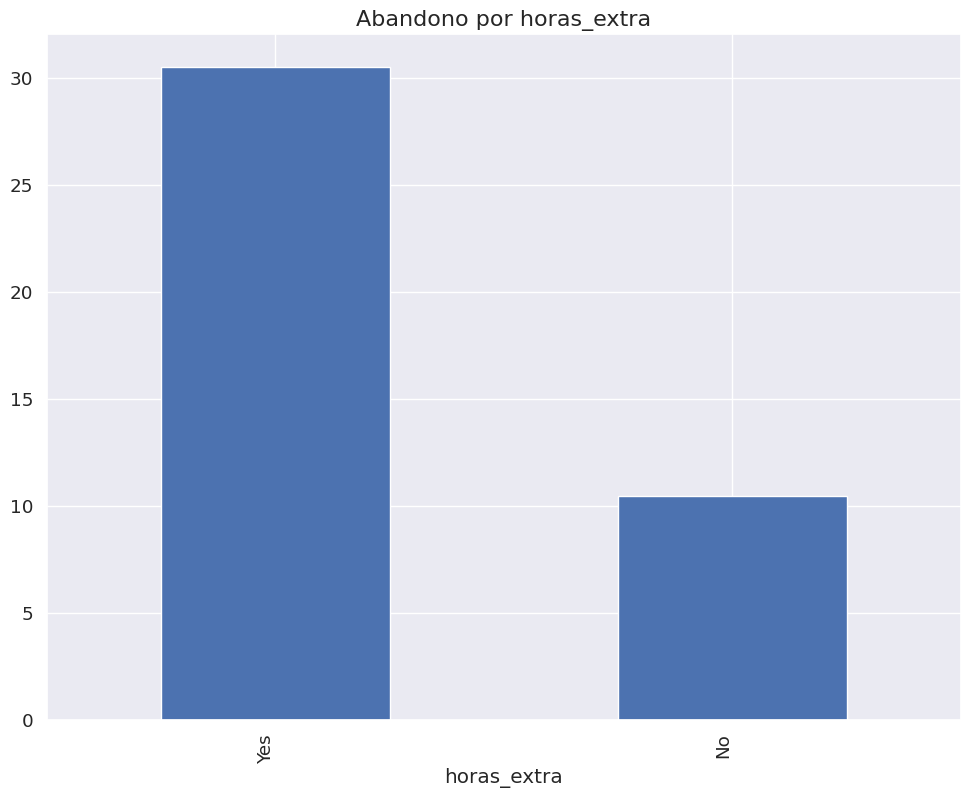

In [81]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por horas_extra', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

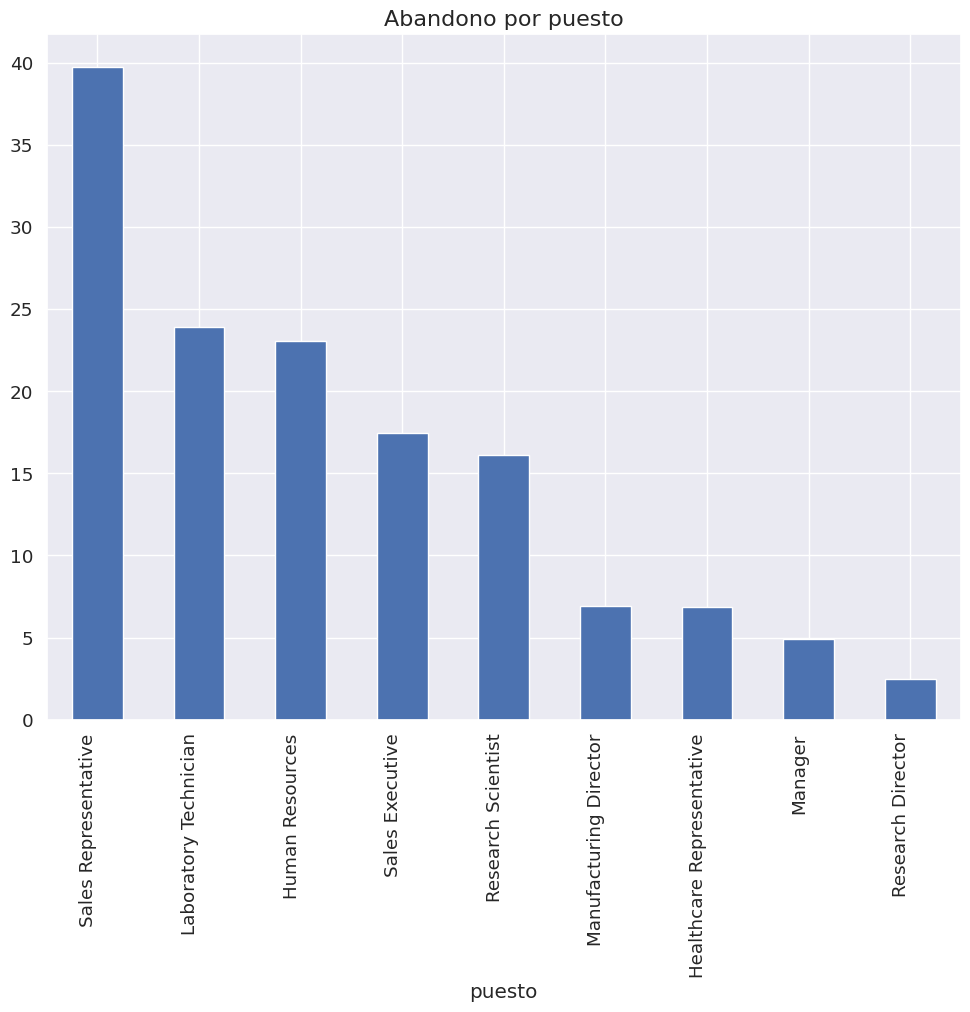

In [82]:
# Analisis por horas extras
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por puesto', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

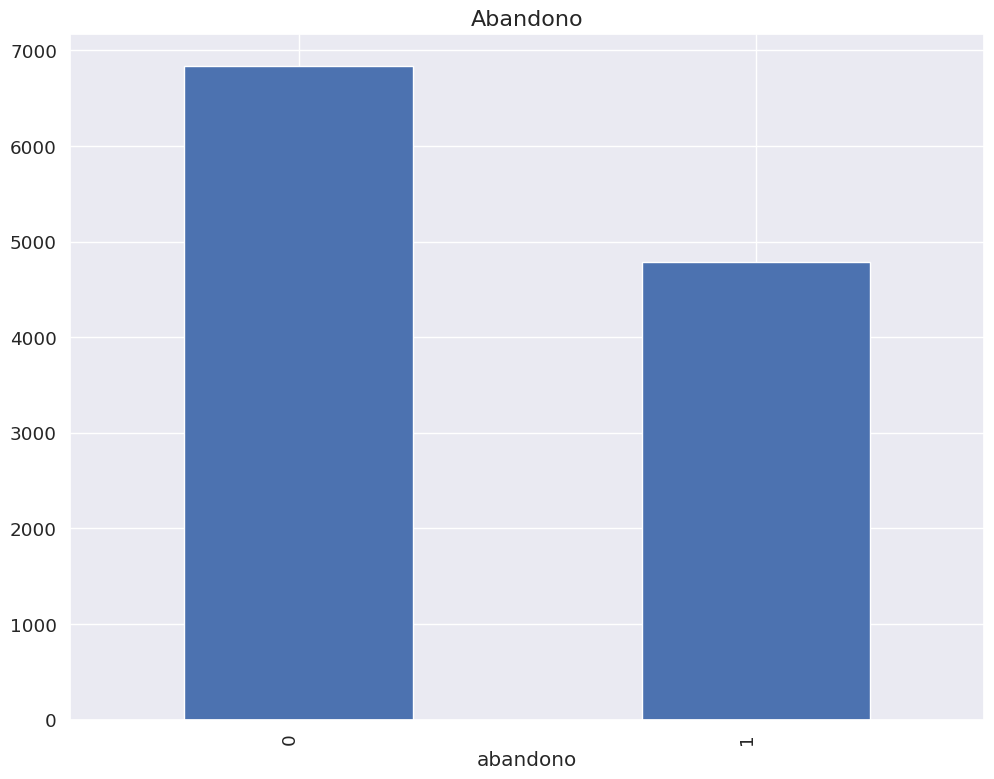

In [83]:
# Analisis por horas extras
temp = df.groupby('abandono').salario_mes.mean()
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [84]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

salario_mes  salario_ano
id                            
1            5993        71916
2            5130        61560
4            2090        25080
5            2909        34908
7            3468        41616
...           ...          ...
2061         2571        30852
2062         9991       119892
2064         6142        73704
2065         5390        64680
2068         4404        52848

[1470 rows x 2 columns]

In [85]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

edad  abandono             viajes            departamento  \
id                                                                
1       41         1      Travel_Rarely                   Sales   
2       49         0  Travel_Frequently  Research & Development   
4       37         1      Travel_Rarely  Research & Development   
5       33         0  Travel_Frequently  Research & Development   
7       27         0      Travel_Rarely  Research & Development   
...    ...       ...                ...                     ...   
2061    36         0  Travel_Frequently  Research & Development   
2062    39         0      Travel_Rarely  Research & Development   
2064    27         0      Travel_Rarely  Research & Development   
2065    49         0  Travel_Frequently                   Sales   
2068    34         0      Travel_Rarely  Research & Development   

      distancia_casa      educacion        carrera satisfaccion_entorno  \
id                                                                        
1                  1  Universitaria  Life Sciences                Media   
2                  8     Secundaria  Life Sciences                 Alta   
4                  2     Secundaria          Other             Muy_Alta   
5                  3  Universitaria  Life Sciences             Muy_Alta   
7                  2  Universitaria        Medical                 Baja   
...              ...            ...            ...                  ...   
2061              23         Master        Medical                 Alta   
2062               6     Secundaria        Medical             Muy_Alta   
2064               4         Master  Life Sciences                Media   
2065               2     Secundaria        Medical             Muy_Alta   
2068               8  Universitaria        Medical                Media   

     implicacion  nivel_laboral  ... evaluacion satisfaccion_companeros  \
id                               ...                                      
1           Alta              2  ...       Alta                    Baja   
2          Media              2  ...   Muy_Alta                Muy_Alta   
4          Media              1  ...       Alta                   Media   
5           Alta              1  ...       Alta                    Alta   
7           Alta              1  ...       Alta                Muy_Alta   
...          ...            ...  ...        ...                     ...   
2061    Muy_Alta              2  ...       Alta                    Alta   
2062       Media              3  ...       Alta                    Baja   
2064    Muy_Alta              2  ...   Muy_Alta                   Media   
2065       Media              2  ...       Alta                Muy_Alta   
2068    Muy_Alta              2  ...       Alta                    Baja   

     nivel_acciones  anos_experiencia  num_formaciones_ult_ano anos_compania  \
id                                                                             
1                 0                 8                        0             6   
2                 1                10                        3            10   
4                 0                 7                        3             0   
5                 0                 8                        3             8   
7                 1                 6                        3             2   
...             ...               ...                      ...           ...   
2061              1                17                        3             5   
2062              1                 9                        5             7   
2064              1                 6                        0             6   
2065              0                17                        3             9   
2068              0                 6                        3             4   

      anos_desde_ult_promocion anos_con_manager_actual salario_ano  \
id                                                                   
1

### ¿Cúanto nos ha costado este problema en el último año?

In [86]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
<br/><br/>

¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [87]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [88]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")
print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")
print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [89]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [90]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [91]:
retenemos = int(se_iran * 0.3)
ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

## DIA 3: MODELO DE MACHINE LEARNING

In [92]:
#Copiamos el dataset a df_ml
df_ml = df.copy()

In [93]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [94]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True);

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [95]:
cat_ohe

viajes_Non-Travel  viajes_Travel_Frequently  viajes_Travel_Rarely  \
0                   0.0                       0.0                   1.0   
1                   0.0                       1.0                   0.0   
2                   0.0                       0.0                   1.0   
3                   0.0                       1.0                   0.0   
4                   0.0                       0.0                   1.0   
...                 ...                       ...                   ...   
1465                0.0                       1.0                   0.0   
1466                0.0                       0.0                   1.0   
1467                0.0                       0.0                   1.0   
1468                0.0                       1.0                   0.0   
1469                0.0                       0.0                   1.0   

      departamento_Human Resources  departamento_Research & Development  \
0                              0.0                                  0.0   
1                              0.0                                  1.0   
2                              0.0                                  1.0   
3                              0.0                                  1.0   
4                              0.0                                  1.0   
...                            ...                                  ...   
1465                           0.0                                  1.0   
1466                           0.0                                  1.0   
1467                           0.0                                  1.0   
1468                           0.0                                  0.0   
1469                           0.0                                  1.0   

      departamento_Sales  educacion_Master  educacion_Primaria  \
0                    1.0               0.0                 0.0   
1                    0.0               0.0                 0.0   
2                    0.0               0.0                 0.0   
3                    0.0               0.0                 0.0   
4                    0.0               0.0                 0.0   
...                  ...               ...                 ...   
1465                 0.0               1.0                 0.0   
1466                 0.0               0.0                 0.0   
1467                 0.0               1.0                 0.0   
1468                 1.0               0.0                 0.0   
1469                 0.0               0.0                 0.0   

      educacion_Secundaria  educacion_Universitaria  ...  \
0                      0.0                      1.0  ...   
1                      1.0                      0.0  ...   
2                      1.0                      0.0  ...   
3                      0.0                      1.0  ...   
4                      0.0                      1.0  ...   
...                    ...                      ...  ...   
1465                   0.0                      0.0  ...   
1466                   1.0                      0.0  ...   
1467                   0.0                      0.0  ...   
1468                   1.0                      0.0  ...   
1469                   0.0                      1.0  ...   

      estado_civil_Married  estado_civil_Single  horas_extra_No  \
0                      0.0                  1.0             0.0   
1                      1.0                  0.0             1.0   
2                      0.0                  1.0             0.0   
3                      1.0                  0.0             0.0   
4                      1.0                  0.0             1.0   
...                    ...                  ...             ...   
1465                   1.0                  0.0             1.0   
1466                   1.0                  0.0             1.0   
1467                   1.0                  0.0             0.0   
1468                

#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [96]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final

In [97]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

viajes_Non-Travel  viajes_Travel_Frequently  viajes_Travel_Rarely  \
0                   0.0                       0.0                   1.0   
1                   0.0                       1.0                   0.0   
2                   0.0                       0.0                   1.0   
3                   0.0                       1.0                   0.0   
4                   0.0                       0.0                   1.0   
...                 ...                       ...                   ...   
1465                0.0                       1.0                   0.0   
1466                0.0                       0.0                   1.0   
1467                0.0                       0.0                   1.0   
1468                0.0                       1.0                   0.0   
1469                0.0                       0.0                   1.0   

      departamento_Human Resources  departamento_Research & Development  \
0                              0.0                                  0.0   
1                              0.0                                  1.0   
2                              0.0                                  1.0   
3                              0.0                                  1.0   
4                              0.0                                  1.0   
...                            ...                                  ...   
1465                           0.0                                  1.0   
1466                           0.0                                  1.0   
1467                           0.0                                  1.0   
1468                           0.0                                  0.0   
1469                           0.0                                  1.0   

      departamento_Sales  educacion_Master  educacion_Primaria  \
0                    1.0               0.0                 0.0   
1                    0.0               0.0                 0.0   
2                    0.0               0.0                 0.0   
3                    0.0               0.0                 0.0   
4                    0.0               0.0                 0.0   
...                  ...               ...                 ...   
1465                 0.0               1.0                 0.0   
1466                 0.0               0.0                 0.0   
1467                 0.0               1.0                 0.0   
1468                 1.0               0.0                 0.0   
1469                 0.0               0.0                 0.0   

      educacion_Secundaria  educacion_Universitaria  ...  \
0                      0.0                      1.0  ...   
1                      1.0                      0.0  ...   
2                      1.0                      0.0  ...   
3                      0.0                      1.0  ...   
4                      0.0                      1.0  ...   
...                    ...                      ...  ...   
1465                   0.0                      0.0  ...   
1466                   1.0                      0.0  ...   
1467                   0.0                      0.0  ...   
1468                   1.0                      0.0  ...   
1469                   0.0                      1.0  ...   

      num_empresas_anteriores  incremento_salario_porc  nivel_acciones  \
0                           8                       11               0   
1                           1                       23               1   
2                           6                       15               0   
3                           1                       11               0   
4                           9                       12               1   
...                       ...                      ...             ...   
1465                        4                       17               1   
1466                        4                       15               1   
1467                    

### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [98]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Separación train y test

In [99]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3)

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [100]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [101]:
#Prección
pred = ac.predict_proba(test_x)[:,1]
pred [:20]

array([0.07317073, 0.66666667, 0.07317073, 0.08878505, 0.92307692,
       0.04859335, 0.04859335, 0.39344262, 0.35820896, 0.04859335,
       0.39344262, 0.04859335, 0.08878505, 0.92307692, 0.24615385,
       0.08878505, 0.04859335, 0.24615385, 0.39344262, 0.04859335])

In [102]:
#Evaluación

from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6992577220847632

#### Diagrama del árbol

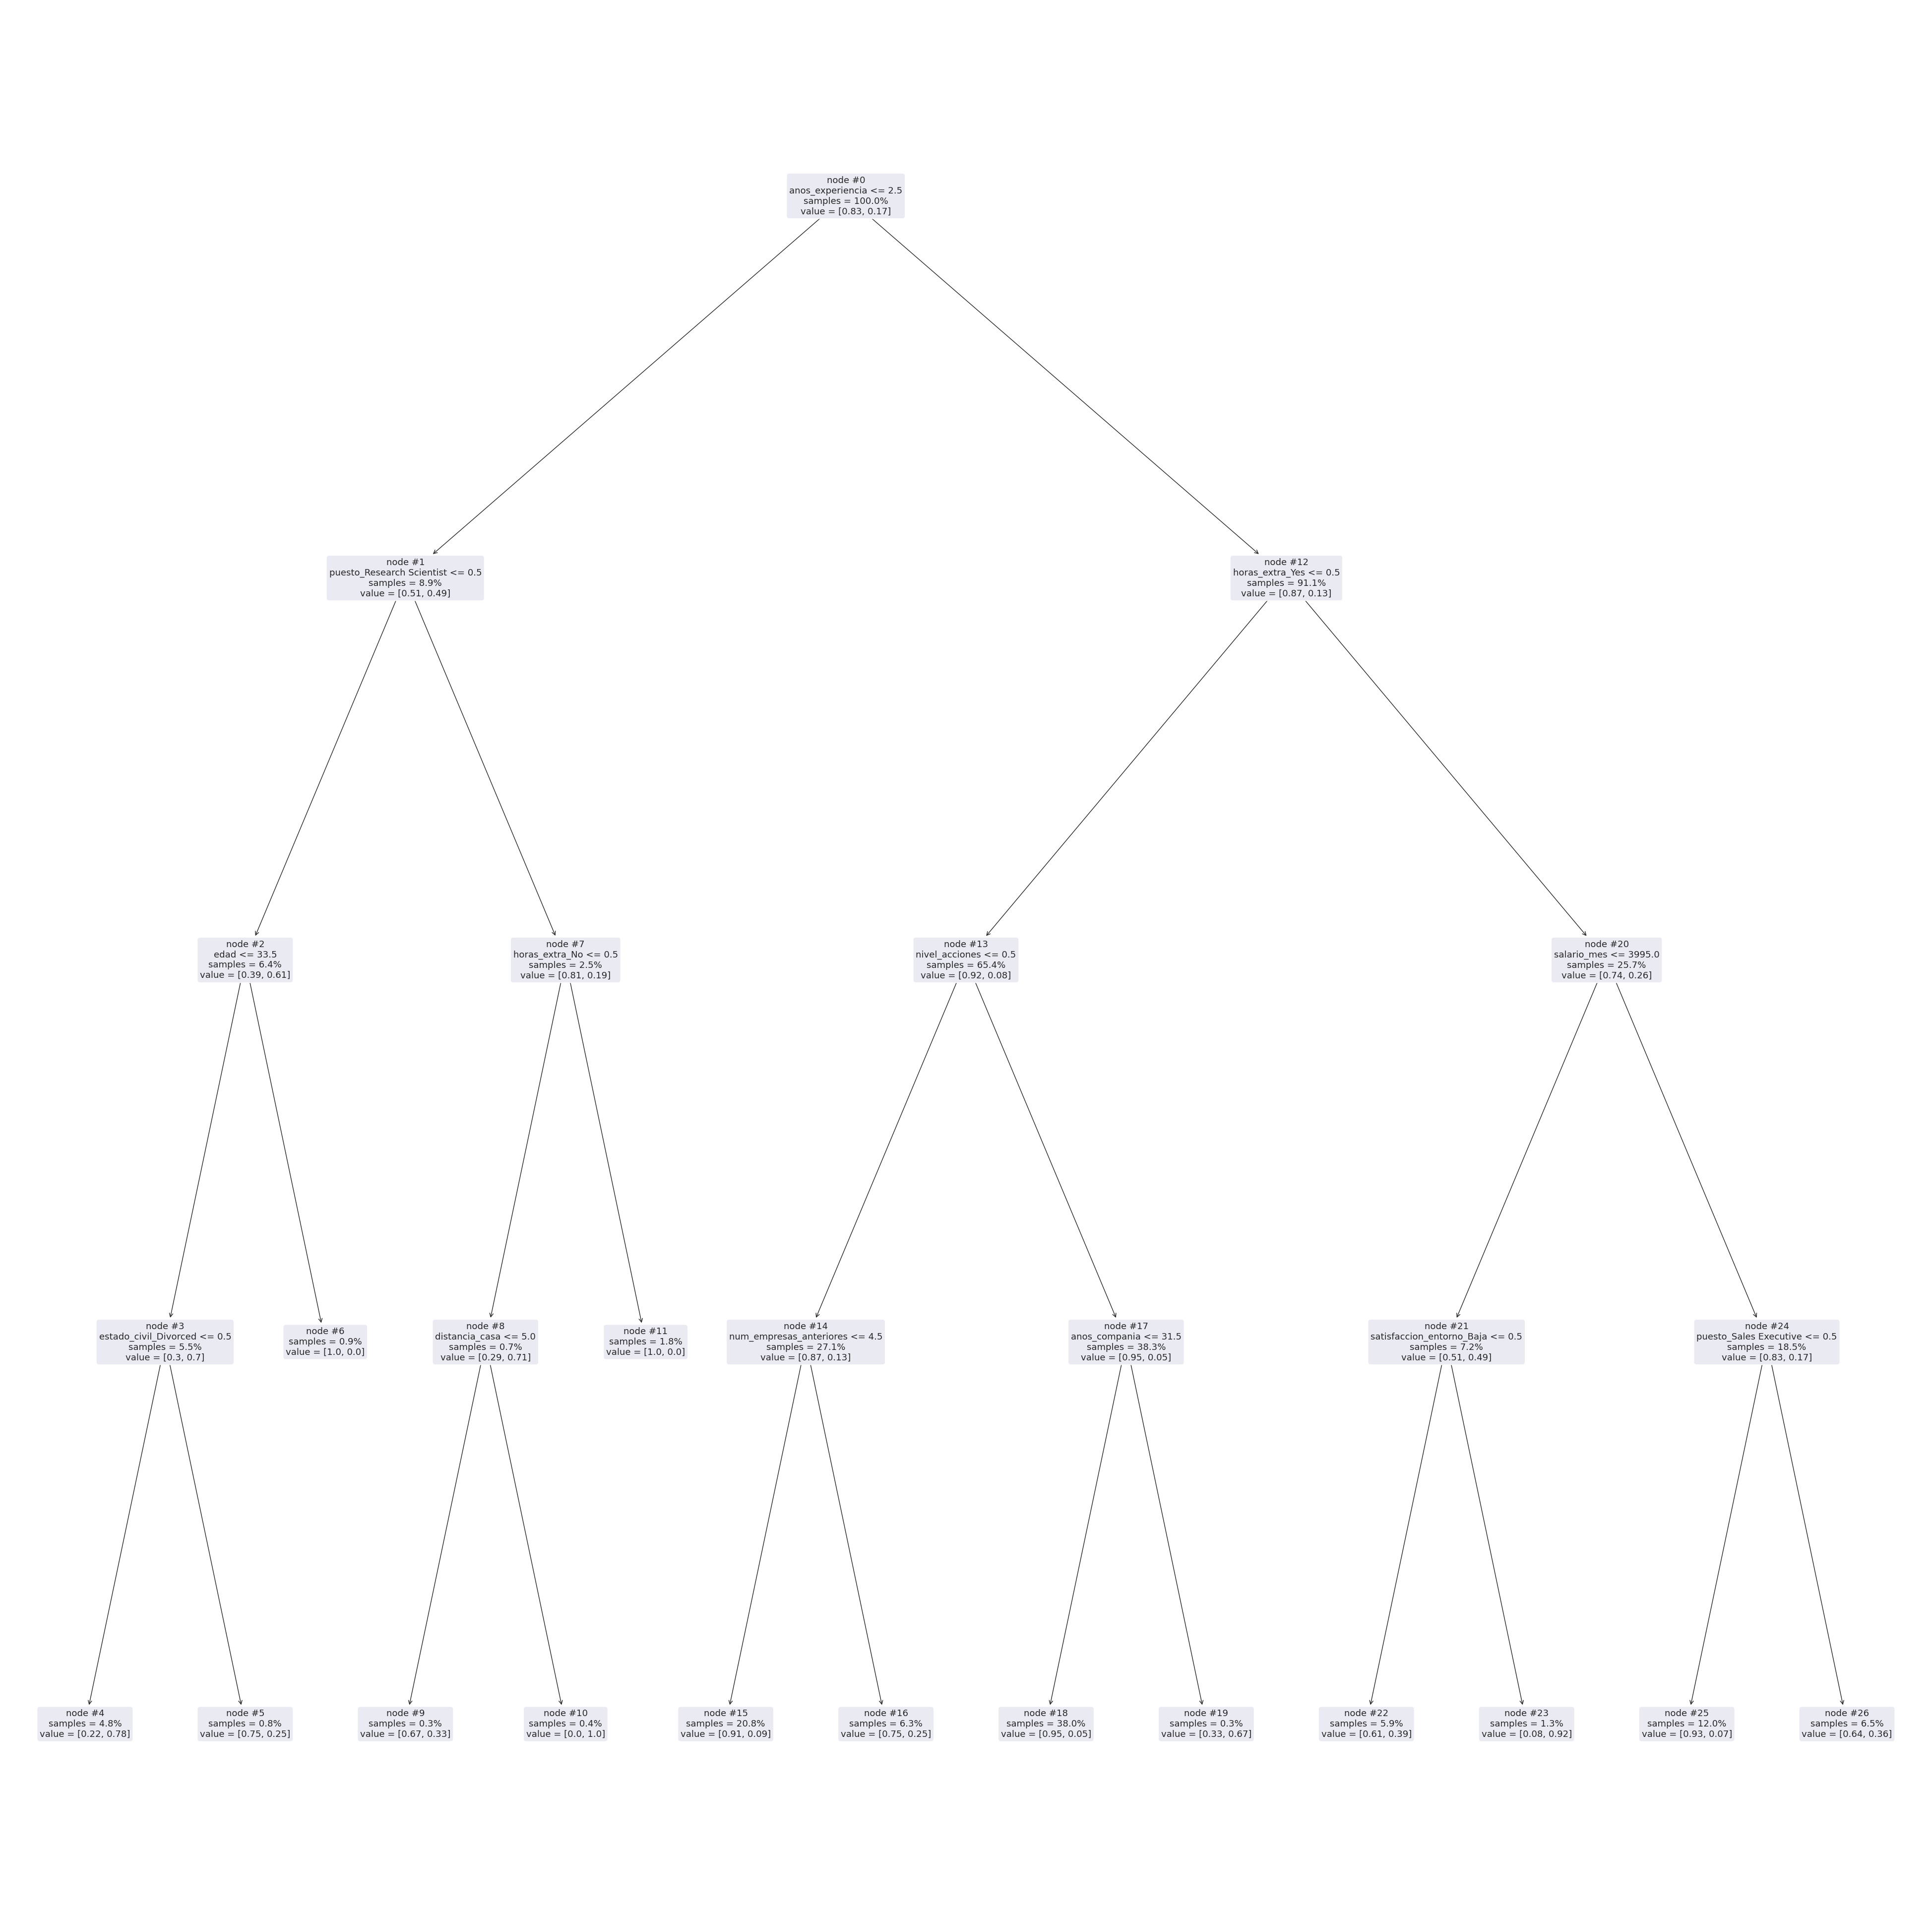

In [103]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importancia de las variables

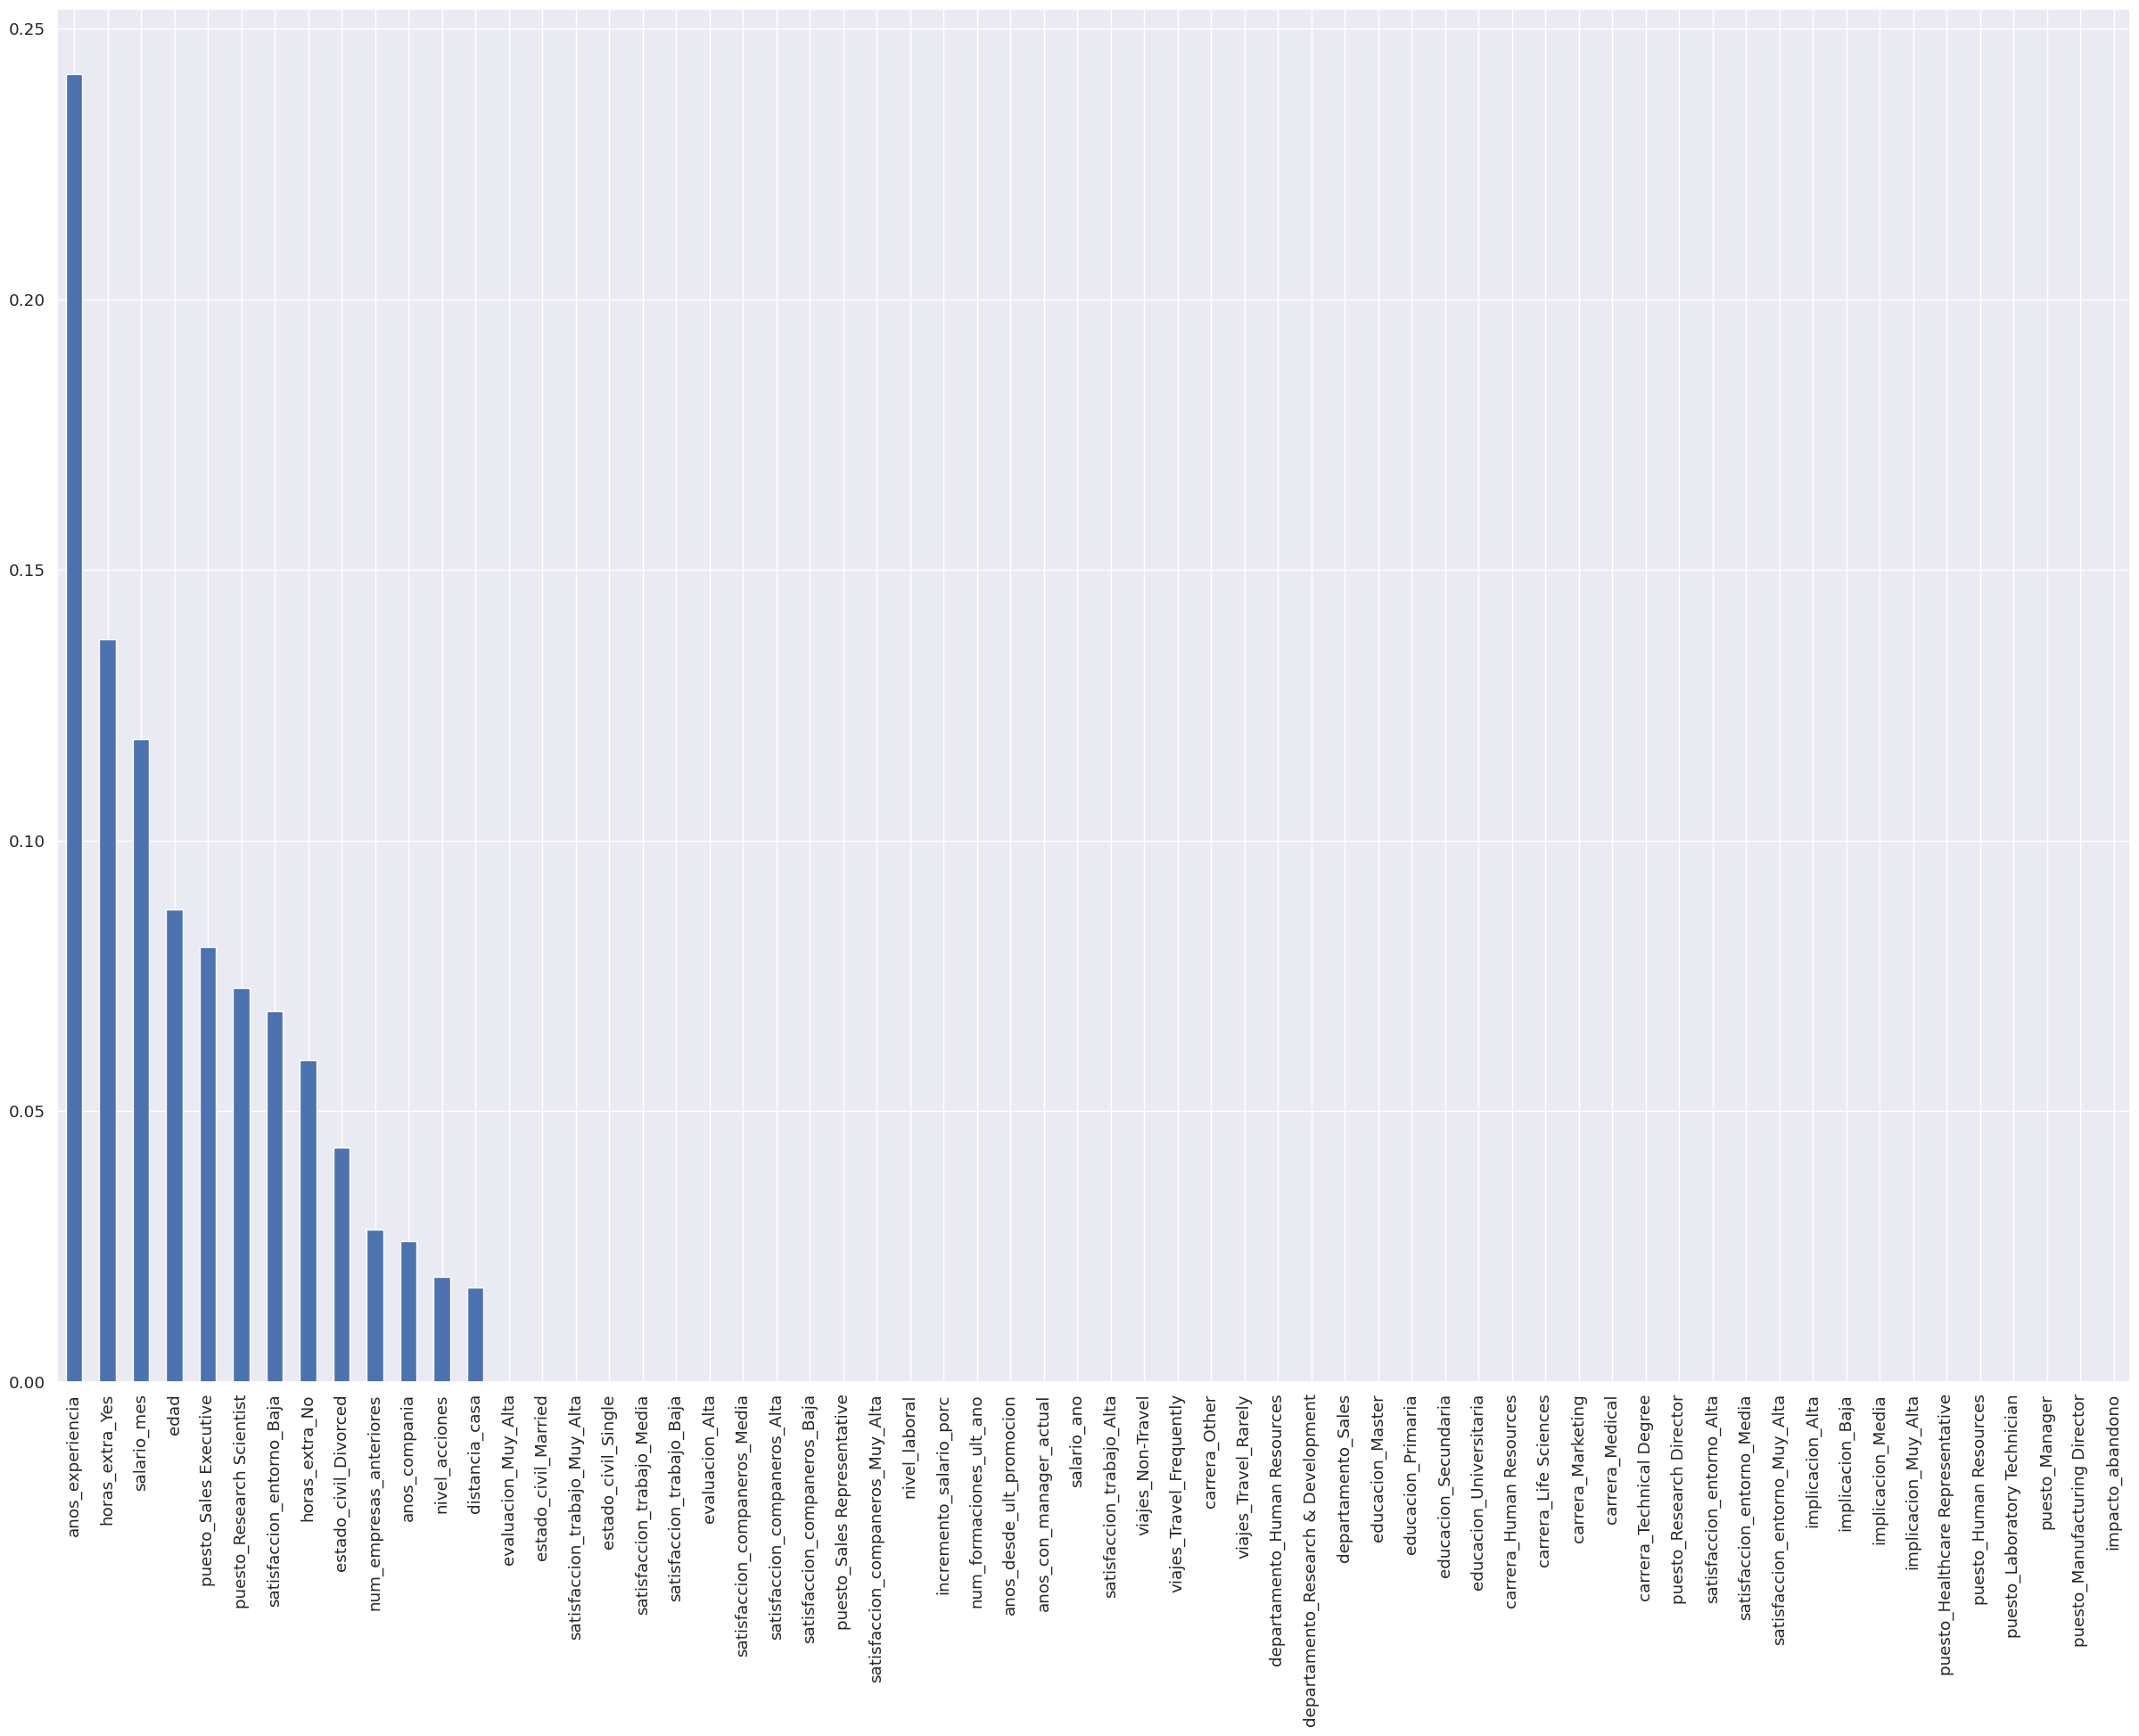

In [104]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

---


In [105]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns= 'abandono'))[:,1]
df.sample(5)

edad  abandono             viajes            departamento  \
id                                                               
510    26         1  Travel_Frequently  Research & Development   
281    40         0      Travel_Rarely  Research & Development   
975    35         0      Travel_Rarely                   Sales   
380    37         0         Non-Travel  Research & Development   
24     38         0      Travel_Rarely  Research & Development   

     distancia_casa      educacion           carrera satisfaccion_entorno  \
id                                                                          
510               3  Universitaria  Technical Degree                 Alta   
281              19  Universitaria           Medical                 Alta   
975              18  Universitaria           Medical                 Alta   
380               1  Universitaria           Medical                 Baja   
24                2  Universitaria     Life Sciences             Muy_Alta   

    implicacion  nivel_laboral  ... satisfaccion_companeros nivel_acciones  \
id                              ...                                          
510        Alta              1  ...                    Alta              0   
281        Alta              2  ...                    Alta              1   
975        Alta              2  ...                   Media              0   
380        Alta              3  ...                    Baja              2   
24         Alta              1  ...                    Alta              0   

    anos_experiencia  num_formaciones_ult_ano  anos_compania  \
id                                                             
510                7                        2              6   
281               15                        2              7   
975                5                        3              5   
380               15                        2              5   
24                 6                        3              3   

    anos_desde_ult_promocion  anos_con_manager_actual salario_ano  \
id                                                                  
510                        0                        4       37224   
281                        3                        7       32892   
975                        1                        0       55212   
380                        0                        2      163236   
24                         1                        2       47328   

    impacto_abandono  scoring_abandono  
id                                      
510         7333.128          0.088785  
281         6479.724          0.393443  
975        11263.248          0.088785  
380        34279.560          0.073171  
24          9323.616          0.393443  

[5 rows x 28 columns]

Ejemplo: riesgo de dejar la empresa por puesto de trabajo

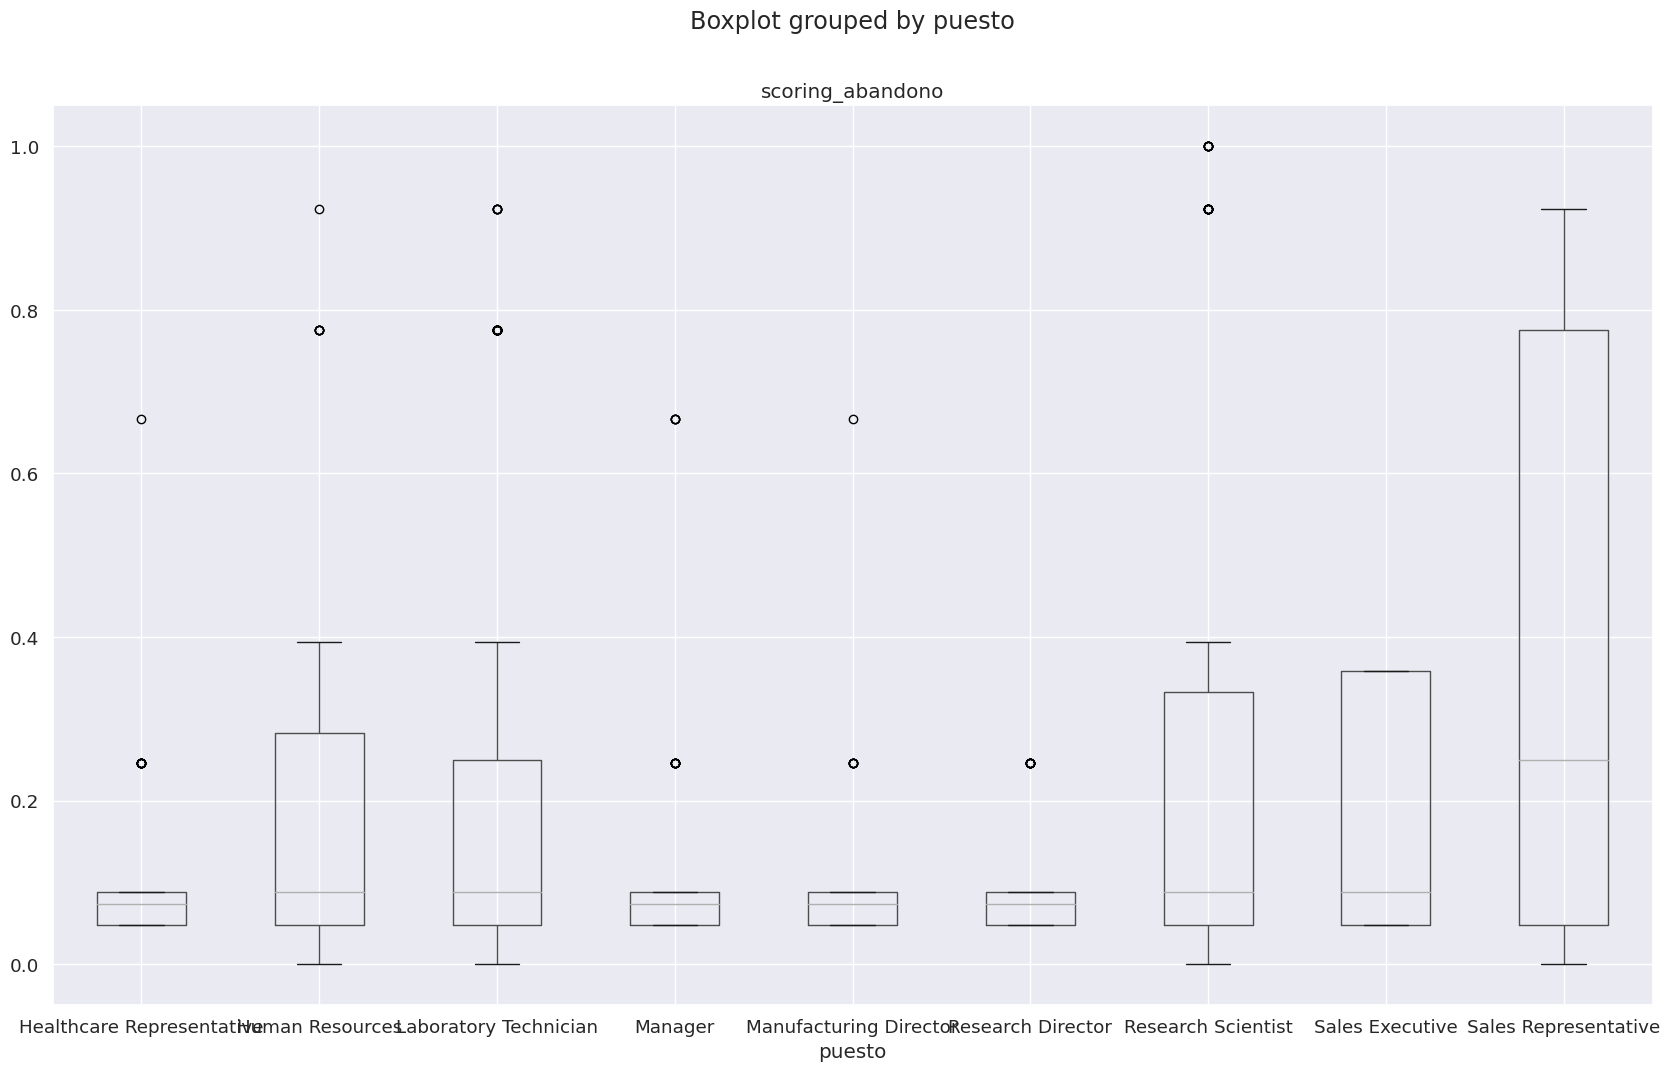

In [106]:
df.boxplot(column='scoring_abandono', by = 'puesto',figsize = (20,12));

### GUARDAR EL RESULTADO

In [107]:
df

edad  abandono             viajes            departamento  \
id                                                                
1       41         1      Travel_Rarely                   Sales   
2       49         0  Travel_Frequently  Research & Development   
4       37         1      Travel_Rarely  Research & Development   
5       33         0  Travel_Frequently  Research & Development   
7       27         0      Travel_Rarely  Research & Development   
...    ...       ...                ...                     ...   
2061    36         0  Travel_Frequently  Research & Development   
2062    39         0      Travel_Rarely  Research & Development   
2064    27         0      Travel_Rarely  Research & Development   
2065    49         0  Travel_Frequently                   Sales   
2068    34         0      Travel_Rarely  Research & Development   

      distancia_casa      educacion        carrera satisfaccion_entorno  \
id                                                                        
1                  1  Universitaria  Life Sciences                Media   
2                  8     Secundaria  Life Sciences                 Alta   
4                  2     Secundaria          Other             Muy_Alta   
5                  3  Universitaria  Life Sciences             Muy_Alta   
7                  2  Universitaria        Medical                 Baja   
...              ...            ...            ...                  ...   
2061              23         Master        Medical                 Alta   
2062               6     Secundaria        Medical             Muy_Alta   
2064               4         Master  Life Sciences                Media   
2065               2     Secundaria        Medical             Muy_Alta   
2068               8  Universitaria        Medical                Media   

     implicacion  nivel_laboral  ... satisfaccion_companeros nivel_acciones  \
id                               ...                                          
1           Alta              2  ...                    Baja              0   
2          Media              2  ...                Muy_Alta              1   
4          Media              1  ...                   Media              0   
5           Alta              1  ...                    Alta              0   
7           Alta              1  ...                Muy_Alta              1   
...          ...            ...  ...                     ...            ...   
2061    Muy_Alta              2  ...                    Alta              1   
2062       Media              3  ...                    Baja              1   
2064    Muy_Alta              2  ...                   Media              1   
2065       Media              2  ...                Muy_Alta              0   
2068    Muy_Alta              2  ...                    Baja              0   

     anos_experiencia  num_formaciones_ult_ano  anos_compania  \
id                                                              
1                   8                        0              6   
2                  10                        3             10   
4                   7                        3              0   
5                   8                        3              8   
7                   6                        3              2   
...               ...                      ...            ...   
2061               17                        3              5   
2062                9                        5              7   
2064                6                        0              6   
2065               17                        3              9   
2068                6                        3              4   

     anos_desde_ult_promocion  anos_con_manager_actual salario_ano  \
id                                                                   
1                           0                        5       71916   
2                           1                        7       61560   
4   

In [108]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

agregar el tema de visualizacion
